In [1]:
import matplotlib.pyplot as plt 
plt.rcParams.update({
    'font.size': 20,
    'figure.figsize': (12, 6)
})
plt.rc('font', family='arial')

import matplotlib.font_manager as fm
font = fm.FontProperties(family = 'arial')
# e.g., 
# plt.title('Single Component', fontproperties = font)

In [2]:
CONSTRAINT_TOOLS = '/scratch/ucgd/lustre-labs/quinlan/u6018199/constraint-tools'
CONSTRAINT_TOOLS_DATA = '/scratch/ucgd/lustre-labs/quinlan/data-shared/constraint-tools'

import sys
sys.path.append(f'{CONSTRAINT_TOOLS}/utilities')

## Non-exonic Chen windows, with Gnocchi, and various features (e.g. GC content), and enhancer-overlap status 

In [3]:
import polars as pl

def get_chen_windows(): 
    df = pl.read_csv(
        f'{CONSTRAINT_TOOLS_DATA}/chen-et-al-2023-published-version/41586_2023_6045_MOESM4_ESM/Supplementary_Data_2.features.constraint_scores.bed',
        separator='\t',
    )
    df = df.to_pandas()
    return df 
    
CHEN_WINDOWS = get_chen_windows()
CHEN_WINDOWS

chrom      start        end   gnocchi  N_observed  \
0        chr1    1432000    1433000  4.299894         259   
1        chr1    1451000    1452000  0.666316         291   
2        chr1    1453000    1454000  0.828398         256   
3        chr1    1458000    1459000 -0.086128         272   
4        chr1    1463000    1464000  2.948188         191   
...       ...        ...        ...       ...         ...   
1003222  chr9  137262000  137263000 -2.396149         302   
1003223  chr9  137268000  137269000  3.640544         212   
1003224  chr9  137269000  137270000  5.276351         209   
1003225  chr9  137275000  137276000  2.687348         290   
1003226  chr9  137290000  137291000  2.162811         223   

         window overlaps enhancer  window overlaps merged_exon      B  \
0                            True                        False  0.653   
1                           False                        False  0.652   
2                           False                        False  0.651   
3                           False                        False  0.651   
4                            True                        False  0.651   
...                           ...                          ...    ...   
1003222                      True                        False  0.536   
1003223                      True                        False  0.536   
1003224                      True                        False  0.536   
1003225                      True                        False  0.536   
1003226                     False                        False  0.536   

         paternal_recombination_rate  maternal_recombination_rate  ...  \
0                           0.039046                     0.025852  ...   
1                           0.039046                     0.025852  ...   
2                           0.039046                     0.025852  ...   
3                           0.039046                     0.025852  ...   
4                           0.039046                     0.025852  ...   
...                              ...                          ...  ...   
1003222                     0.057053                     0.063434  ...   
1003223                     0.057053                     0.063434  ...   
1003224                     0.057053                     0.063434  ...   
1003225                     1.564889                     0.024254  ...   
1003226                    16.626887                     0.384797  ...   

         lambda_M3starHMT6.EUR  GC_content_1000bp  GC_content_10000bp  \
0                     2.585568           0.661339            0.641836   
1                     2.585568           0.556444            0.552845   
2                     2.585568           0.537463            0.561944   
3                     2.585568           0.532468            0.596740   
4                     2.585568           0.540460            0.568843   
...                        ...                ...                 ...   
1003222               2.281162           0.500499            0.542646   
1003223               2.281162           0.552448            0.589941   
1003224               2.281162           0.519481            0.585042   
1003225               2.281162           0.603397            0.639236   
1003226               2.281162           0.507492            0.512249   

         GC_content_100000bp  GC_content_1000000bp  cpg_island_overlap  \
0                   0.565094              0.577534                 NaN   
1                   0.572894              0.575506                 NaN   
2                   0.572564              0.575129                 NaN   
3                   0.570774              0.575225                 NaN   
4                   0.576514              0.574420                 NaN   
...                      ...                   ...                 ...   
1003222             0.611944              0.568316                45.0   
1003223             0.613074            

## Non-exonic Chen windows, with lambda_s (Dukler et al), and various features (e.g. GC content), and enhancer-overlap status 

In [4]:
def get_chen_windows_with_lambda_s(): 
    # https://mail.google.com/mail/u/0/#inbox/QgrcJHrjCsBTxVdFdTZvkMTlDfGKRnDvZxl
    # http://compgen.cshl.edu/extrainsight/description.php
    df = pl.read_csv(
        f'{CONSTRAINT_TOOLS_DATA}/lambda_s/Results_RandomlyChosen_July15.csv',
        infer_schema_length=1000000,
    )
    df = df.with_columns(
        df["start"].cast(pl.Int64),
        df["end"].cast(pl.Int64),
    )
    df = df.to_pandas()

    # note that df is NOT a strict subset of CHEN_WINDOWS
    # therefore an inner join of df and CHEN_WINDOWS is expected to reduce the size of df 
    df = CHEN_WINDOWS.merge(df, left_on=['chrom', 'start', 'end'], right_on=['chr', 'start', 'end'], how='inner')
    df = df.drop(columns=['chr'])

    return df 
    
CHEN_WINDOWS_WITH_LAMBDA_S = get_chen_windows_with_lambda_s()
CHEN_WINDOWS_WITH_LAMBDA_S

chrom      start        end   gnocchi  N_observed  \
0      chr1    1515000    1516000  0.408249         294   
1      chr1    1706000    1707000 -0.266554         303   
2      chr1    2136000    2137000  1.276164         259   
3      chr1    2218000    2219000  2.326781         170   
4      chr1    2258000    2259000  1.491896         228   
...     ...        ...        ...       ...         ...   
60410  chr9  136425000  136426000  0.101003         272   
60411  chr9  136425000  136426000  0.101003         272   
60412  chr9  136801000  136802000  3.873603         192   
60413  chr9  136938000  136939000 -0.210415         315   
60414  chr9  137290000  137291000  2.162811         223   

       window overlaps enhancer  window overlaps merged_exon      B  \
0                         False                        False  0.651   
1                          True                        False  0.633   
2                          True                        False  0.840   
3                         False                        False  0.840   
4                          True                        False  0.845   
...                         ...                          ...    ...   
60410                     False                        False  0.702   
60411                     False                        False  0.702   
60412                      True                        False  0.594   
60413                      True                        False  0.576   
60414                     False                        False  0.536   

       paternal_recombination_rate  maternal_recombination_rate  ...  \
0                         0.039046                     0.025852  ...   
1                         0.000300                     0.000008  ...   
2                         0.941305                     0.024670  ...   
3                         0.185468                     0.016164  ...   
4                         0.003747                     0.000278  ...   
...                            ...                          ...  ...   
60410                     0.441199                     0.105960  ...   
60411                     0.441199                     0.105960  ...   
60412                     0.003674                     0.000222  ...   
60413                     0.070798                     0.011236  ...   
60414                    16.626887                     0.384797  ...   

       window_overlaps_cpg_island  N_mean_null_gnocchi  \
0                           False           301.083845   
1                           False           298.395511   
2                           False           280.368353   
3                           False           203.165001   
4                           False           251.667478   
...                           ...                  ...   
60410                       False           273.670890   
60411                       False           273.670890   
60412                       False           253.698420   
60413                       False           311.287583   
60414                       False           257.721105   

       depletion_rank_constraint_score  \
0                             0.885555   
1                             0.964573   
2                             0.433308   
3                             0.107791   
4                             0.517114   
...                                ...   
60410                         0.892303   
60411                         0.892303   
60412                         0.306802   
60413                         0.932211   
60414                         0.423047   

       depletion_rank_constraint_score_complement  strong_selection         p  \
0                                        0.114445         -0.063607  0.366898   
1                                        0.035427         -0.099045  0.175944   
2                                        0.566692         -0.140429  0.056934   
3                                        0.892209    

(-0.5, 0.5)

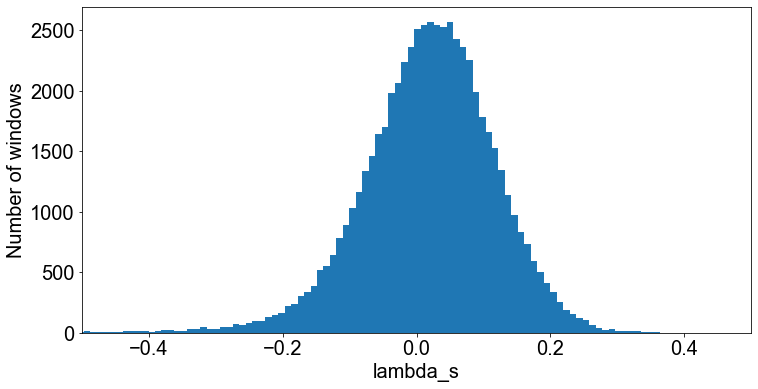

In [5]:
ax = CHEN_WINDOWS_WITH_LAMBDA_S['strong_selection'].hist(bins=200)
# http://compgen.cshl.edu/extrainsight/description.php
ax.set_xlabel('lambda_s') 
ax.set_ylabel('Number of windows')
ax.grid(False)
ax.set_xlim(-0.5, 0.5)

Text(0, 0.5, 'Number of windows')

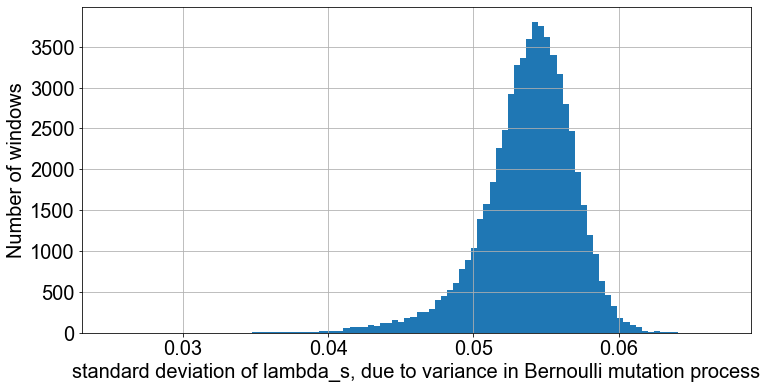

In [6]:
ax = CHEN_WINDOWS_WITH_LAMBDA_S['se'].hist(bins=100)
# http://compgen.cshl.edu/extrainsight/description.php
ax.set_xlabel('standard deviation of lambda_s, due to variance in Bernoulli mutation process') 
ax.set_ylabel('Number of windows')

Text(0, 0.5, 'Number of windows')

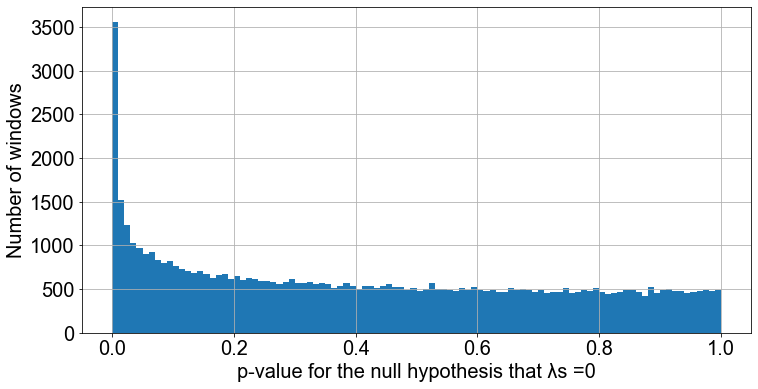

In [7]:
ax = CHEN_WINDOWS_WITH_LAMBDA_S['p'].hist(bins=100) 
# http://compgen.cshl.edu/extrainsight/description.php
ax.set_xlabel('p-value for the null hypothesis that λs =0')
ax.set_ylabel('Number of windows')

## Non-exonic Halldorsson windows, with Depletion Rank score, and various features (e.g. GC content), and enhancer-overlap status 

In [8]:
def get_halldorsson_windows(): 
    df = pl.read_csv(
        f'{CONSTRAINT_TOOLS_DATA}/depletion_rank_scores/41586_2022_4965_MOESM3_ESM.noncoding.enhancer.BGS.gBGC.GC_content.bed', 
        separator='\t'
    )
    df = df.with_columns((1-pl.col('depletion_rank')).alias('depletion_rank_constraint_score_complement'))
    df = df.to_pandas()
    return df

HALLDORSSON_WINDOWS = get_halldorsson_windows()
HALLDORSSON_WINDOWS

chromosome      start        end  depletion_rank  enhancer_overlap  \
0              chr1    1382950    1383450        0.637265             500.0   
1              chr1    1383000    1383500        0.696719             500.0   
2              chr1    1383050    1383550        0.856514             500.0   
3              chr1    1383100    1383600        0.848593             499.0   
4              chr1    1383150    1383650        0.940270             449.0   
...             ...        ...        ...             ...               ...   
38632861       chr9  137985250  137985750        0.162180               NaN   
38632862       chr9  137985300  137985800        0.103548               NaN   
38632863       chr9  137985350  137985850        0.137103               NaN   
38632864       chr9  137985400  137985900        0.192227               NaN   
38632865       chr9  137985450  137985950        0.125230               NaN   

          window overlaps enhancer      B  B_M1star.EUR  GC_content_1000bp  \
0                             True  0.653      0.108103           0.507492   
1                             True  0.653      0.108103           0.510490   
2                             True  0.653      0.108103           0.508492   
3                             True  0.653      0.108103           0.518481   
4                             True  0.653      0.108103           0.512488   
...                            ...    ...           ...                ...   
38632861                     False  0.536      0.165515           0.578422   
38632862                     False  0.536      0.165515           0.575425   
38632863                     False  0.536      0.165515           0.578422   
38632864                     False  0.536      0.165515           0.581419   
38632865                     False  0.536      0.165515           0.581419   

          GC_content_10000bp  GC_content_100000bp  \
0                   0.549345             0.580424   
1                   0.548945             0.580354   
2                   0.550245             0.580274   
3                   0.549245             0.580314   
4                   0.549545             0.580284   
...                      ...                  ...   
38632861            0.518648             0.489205   
38632862            0.519848             0.489175   
38632863            0.520048             0.489265   
38632864            0.520548             0.489265   
38632865            0.519948             0.489225   

          depletion_rank_constraint_score_complement  
0                                           0.362735  
1                                           0.303281  
2                                           0.143486  
3                                           0.151407  
4                                           0.059730  
...                                              ...  
38632861                                    0.837820  
38632862                                    0.896452  
38632863                                    0.862897  
38632864                                    0.807773  
38632865                                    0.874770  

[38632866 rows x 12 columns]

## Baseline classifier

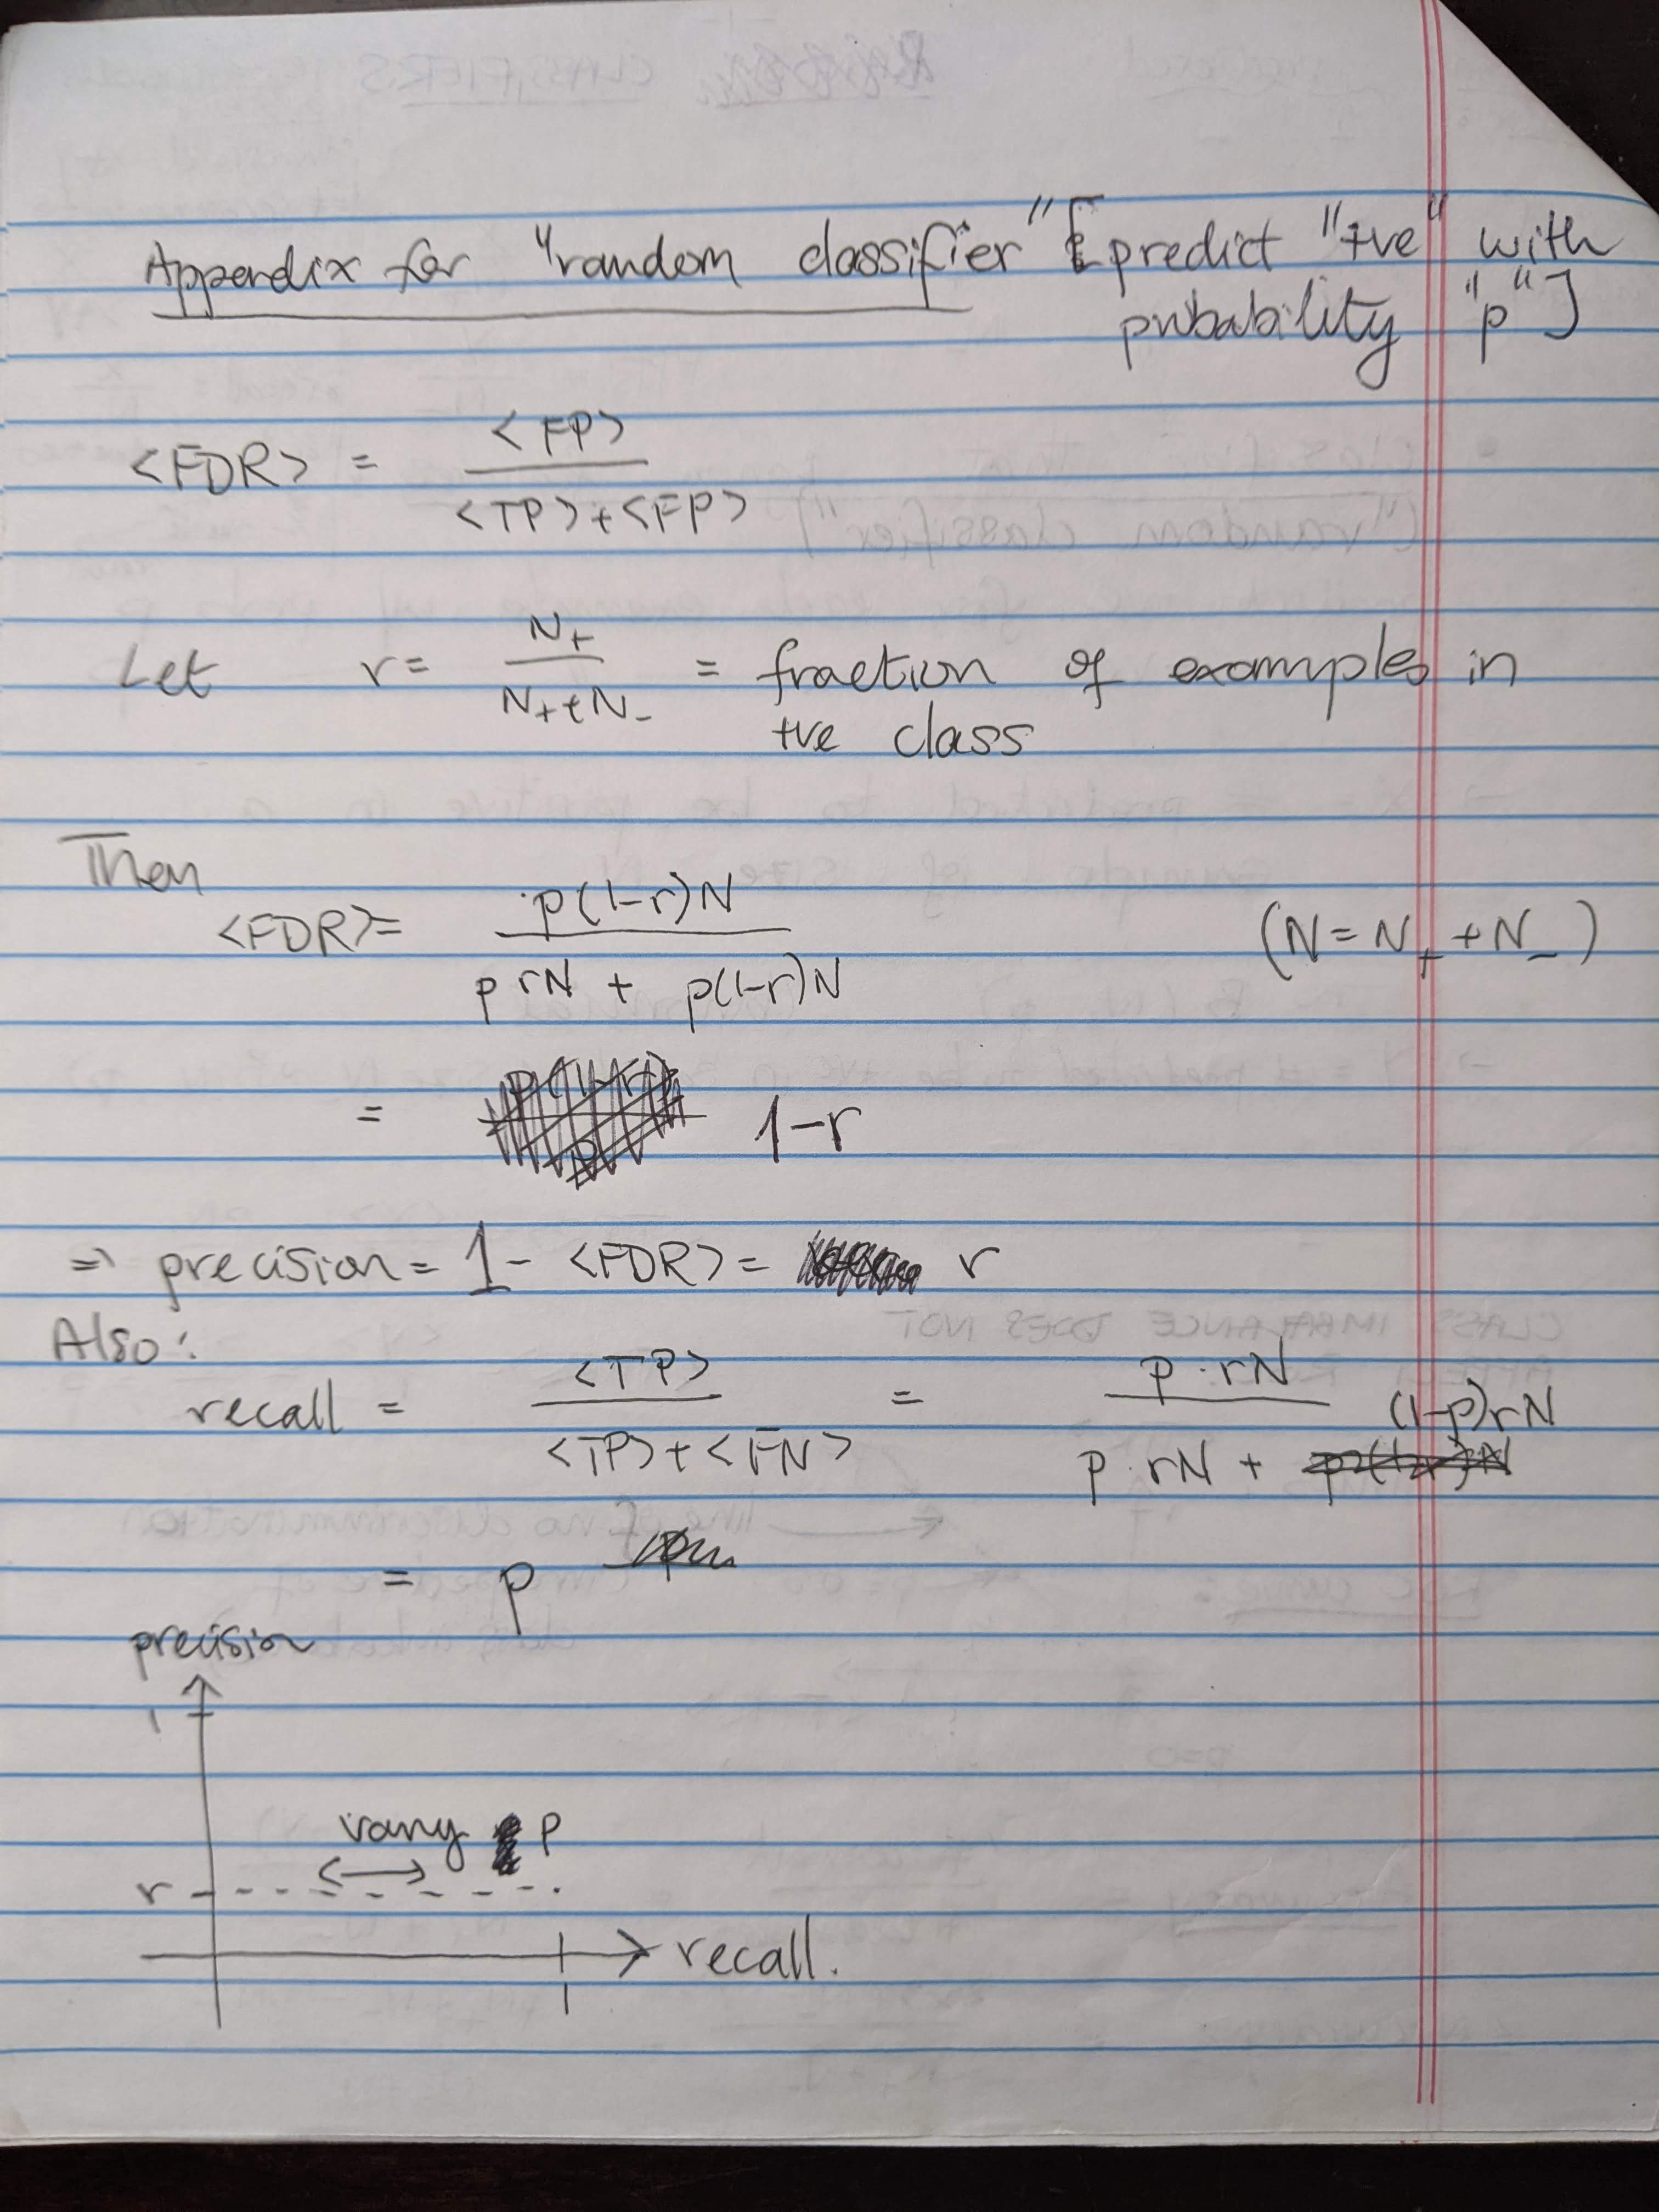

In [9]:
from IPython.display import Image # type: ignore
Image(filename='../precision_recall_random_classifier.jpg', width=600)

## Features that negatively impact a constraint-score-based classifier

In [10]:
import matplotlib.cm as cm
import importlib
import numpy as np

import sys
import os
sys.path.append(os.path.abspath(os.path.join('..')))

import util
importlib.reload(util)
from util import (
  length_to_string, 
  compute_limits as _compute_limits, 
  slice_feature_space,
  plot_feature_distribution
)

In [11]:
import pandas as pd

def downsample(df, group_columns, target):
  positive_class_sizes = df.groupby(group_columns)[target].apply(lambda ser: ser.value_counts().get(True, 0))
  negative_class_sizes = df.groupby(group_columns)[target].apply(lambda ser: ser.value_counts().get(False, 0))  
  positive_to_negative_ratios = positive_class_sizes/negative_class_sizes
  min_positive_to_negative_ratio = positive_to_negative_ratios.min()

  def downsample_positive_class(group):
    negative_class = group[group[target] == False]
    negative_class_size = len(negative_class)
    positive_class = group[group[target] == True]
    new_positive_class_size = int(min_positive_to_negative_ratio*negative_class_size)
    positive_class_downsampled = positive_class.sample(new_positive_class_size)
    return pd.concat([positive_class_downsampled, negative_class])
  
  df_downsampled = df.groupby(group_columns).apply(downsample_positive_class).reset_index(drop=True)
  return df_downsampled

def preprocess(df, feature, target, number_bins): 
  df = df.copy() 
  df[f'{feature}_bin'] = pd.cut(df[f'{feature}'], bins=number_bins) 
  df = downsample(
    df, 
    group_columns=[f'{feature}_bin'], 
    target=target
  )
  return df 

def get_GC_mean_factor(gc_window_size): 
  if gc_window_size == 1000: 
    return 1
  elif gc_window_size == 1000000:
    return 0.975
  else:
    raise ValueError(f'invalid GC window size: {gc_window_size}')
                     
def get_GC_std_factor(gc_window_size): 
  if gc_window_size == 1000: 
    return 0.3
  elif gc_window_size == 1000000:
    return 0.3
  else:
    raise ValueError(f'invalid GC window size: {gc_window_size}')
  
def compute_center_limits(df, feature, mean_factor, std_factor):
  return _compute_limits(df, feature, mean_factor, std_factor)

def compute_GC_tail_limits(gc_window_size):
  if gc_window_size == 1000: 
    return 0.5, 1.0
  elif gc_window_size == 1000000:
    return 0.440, 1.0
  else:
    raise ValueError(f'invalid GC window size: {gc_window_size}')

def get_GC_feature_lims_label(df, gc_window_size): 
  return ( 
    f'GC_content_{gc_window_size}bp', 
    compute_center_limits(
      df, 
      f'GC_content_{gc_window_size}bp', 
      mean_factor=get_GC_mean_factor(gc_window_size), 
      std_factor=get_GC_std_factor(gc_window_size)
    ), 
    compute_GC_tail_limits(gc_window_size),
    f'GC_content ({length_to_string(gc_window_size)})'
  )

def get_features_and_lims_and_labels(df, gc_window_size, log=False): 
  features_and_lims_and_labels = [
    get_GC_feature_lims_label(df, gc_window_size),
    (
      'B_M1star.EUR', 
      compute_center_limits(
        df, 
        'B_M1star.EUR', 
        mean_factor=1, 
        std_factor=0.3
      ), 
      (0.75, 1.5),
      'gBGC'
    ),
    (
      'B', 
      compute_center_limits(
        df, 
        'B', 
        mean_factor=1, 
        std_factor=0.3
      ), 
      (0.5, 0.55),
      'BGS'
    ),
  ]

  if log: 
    for f, cl, _, _ in features_and_lims_and_labels: 
      print(f'{f}: {cl}')

  return features_and_lims_and_labels 


In [12]:
# this is "r" in the baseline-classifier theory: 
def compute_positive_fraction(df, target):
  value_counts = df[target].value_counts()
  number_negative_examples = value_counts.get(False, 0)
  number_positive_examples = value_counts.get(True, 0)
  return number_positive_examples / (number_negative_examples + number_positive_examples)

(0.212, 0.313]: 43846
(0.212, 0.313]: r = 0.09848104730192035; precision = 0.18839634941329855; precision/r = 1.913021384061021; FDR = 0.8116036505867015; FDR/(1-r) = 0.9002624383632997
(0.313, 0.412]: 466937
(0.313, 0.412]: r = 0.0984800947451155; precision = 0.15875315922493682; precision/r = 1.6120329660102282; FDR = 0.8412468407750632; FDR/(1-r) = 0.9331428356395742
(0.412, 0.512]: 233465
(0.412, 0.512]: r = 0.09847728781616089; precision = 0.13953151692387875; precision/r = 1.4168903309396437; FDR = 0.8604684830761212; FDR/(1-r) = 0.954461237023892
(0.512, 0.612]: 24048
(0.512, 0.612]: r = 0.09846972721224219; precision = 0.12411942301241194; precision/r = 1.260483059376048; FDR = 0.875880576987588; FDR/(1-r) = 0.9715487138098486
(0.612, 0.711]: 703
(0.711, 0.811]: 1


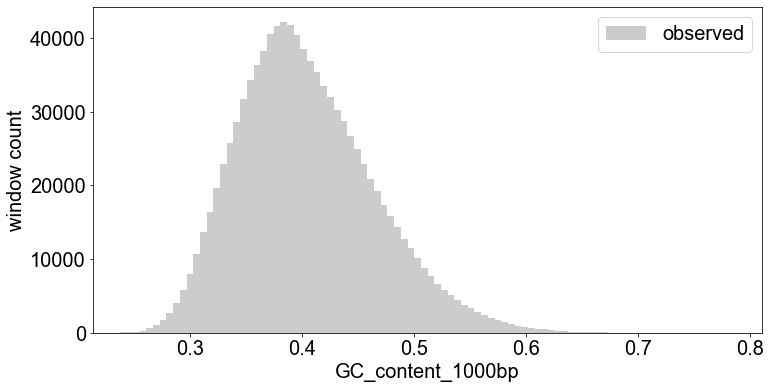

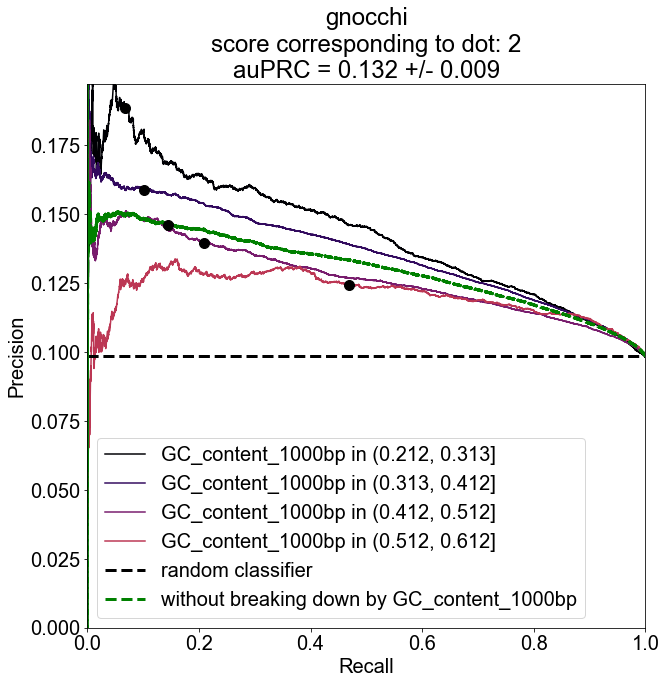

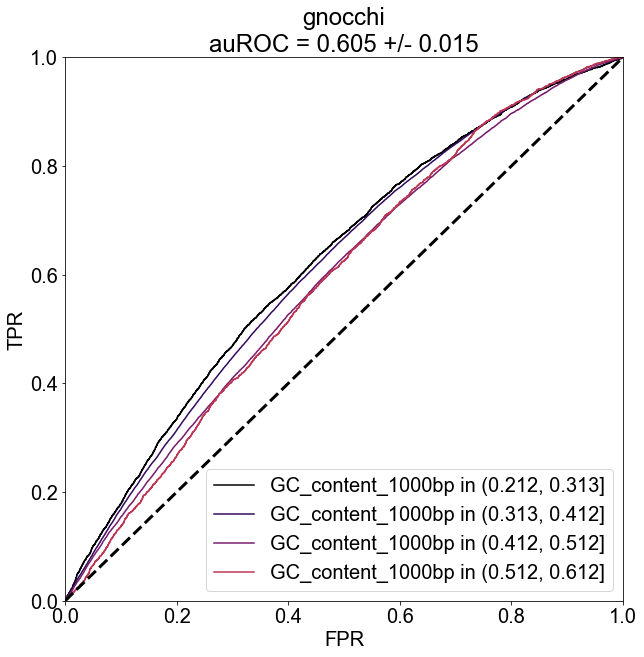

conditioning on B_M1star.EUR in [0.23484766553012815, 0.39348785122344543]
conditioning on B in [0.7824028390130828, 0.8536915045402709]
(0.234, 0.322]: 3576
(0.322, 0.409]: 22119
(0.322, 0.409]: r = 0.1073737510737375; precision = 0.18506998444790046; precision/r = 1.7236054677907833; FDR = 0.8149300155520995; FDR/(1-r) = 0.9129577093799073
(0.409, 0.496]: 9991
(0.409, 0.496]: r = 0.1072965669102192; precision = 0.15454545454545454; precision/r = 1.440357869742198; FDR = 0.8454545454545455; FDR/(1-r) = 0.9470721340549796
(0.496, 0.582]: 1192
(0.582, 0.669]: 64


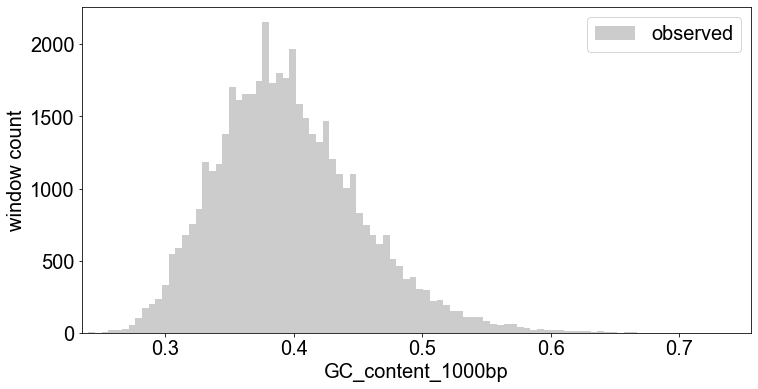

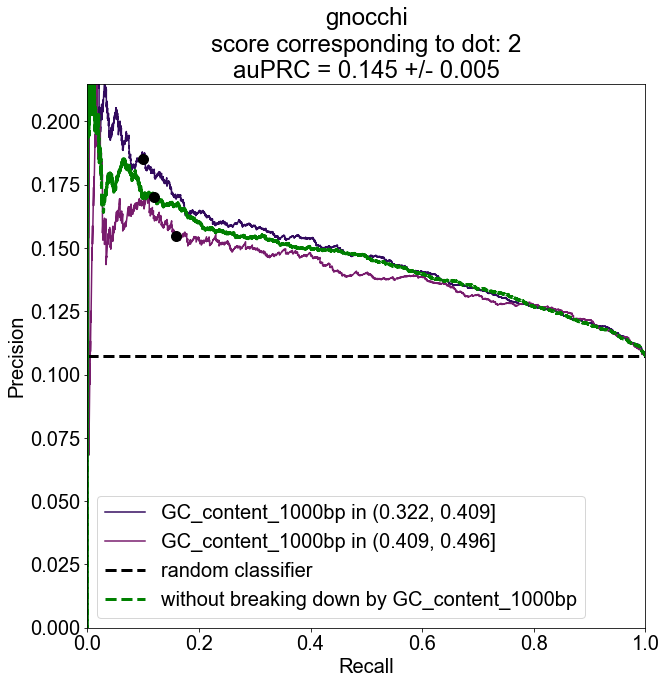

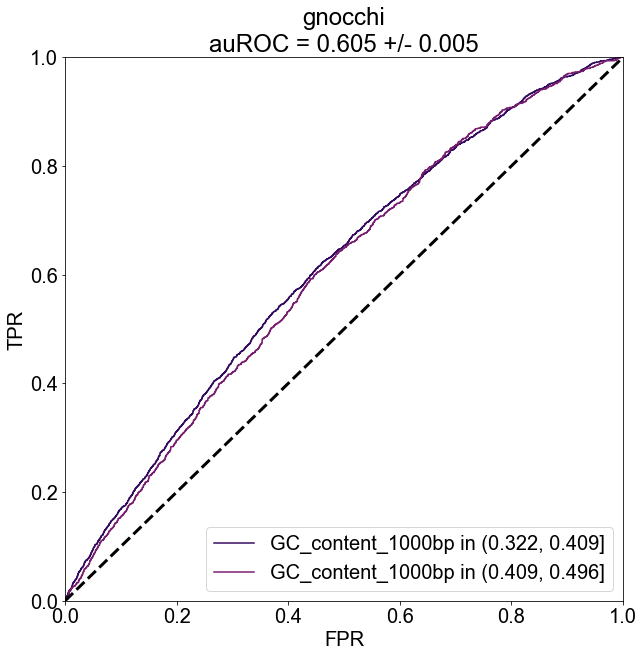

(0.0942, 0.219]: 3735
(0.219, 0.344]: 7435022
(0.219, 0.344]: r = 0.01633189518470826; precision = 0.025149415075385075; precision/r = 1.5398956943424886; FDR = 0.974850584924615; FDR/(1-r) = 0.9910360823457496
(0.344, 0.469]: 19971207
(0.344, 0.469]: r = 0.016331962309538928; precision = 0.023825648388371798; precision/r = 1.458835621635991; FDR = 0.9761743516116282; FDR/(1-r) = 0.9923818953227075
(0.469, 0.593]: 3373961
(0.469, 0.593]: r = 0.01633184260280424; precision = 0.02399028042293295; precision/r = 1.4689267467477138; FDR = 0.9760097195770671; FDR/(1-r) = 0.9922144091352992
(0.593, 0.718]: 142473
(0.593, 0.718]: r = 0.016325900346030476; precision = 0.037493256608523644; precision/r = 2.2965506228659454; FDR = 0.9625067433914763; FDR/(1-r) = 0.9784813321099546
(0.718, 0.842]: 312


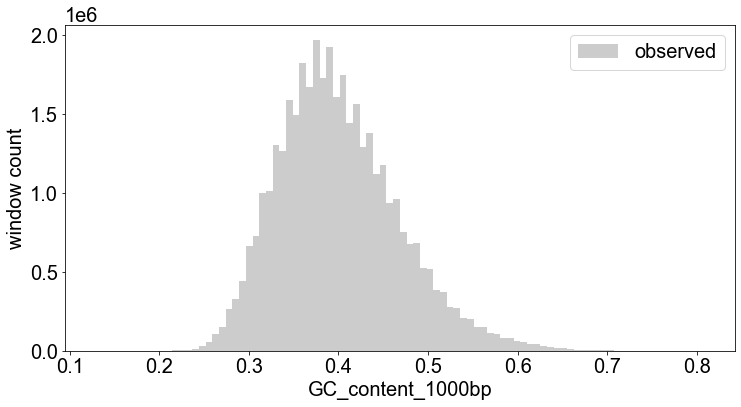

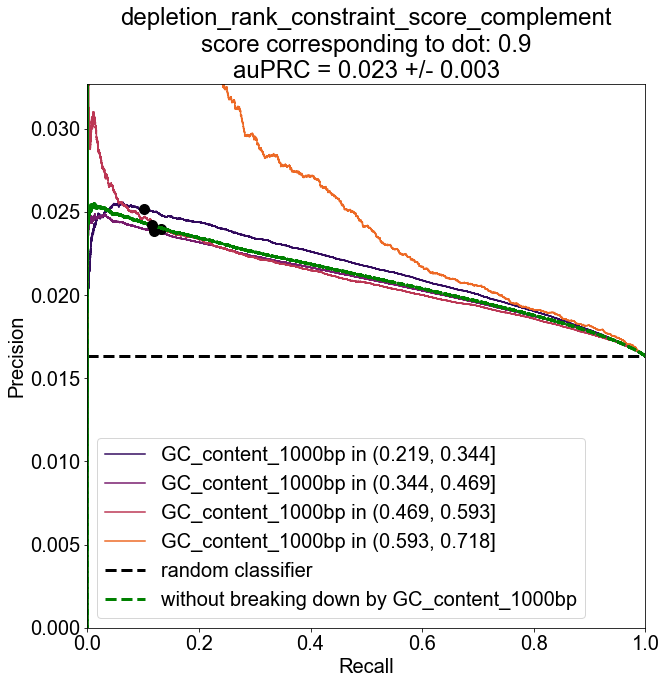

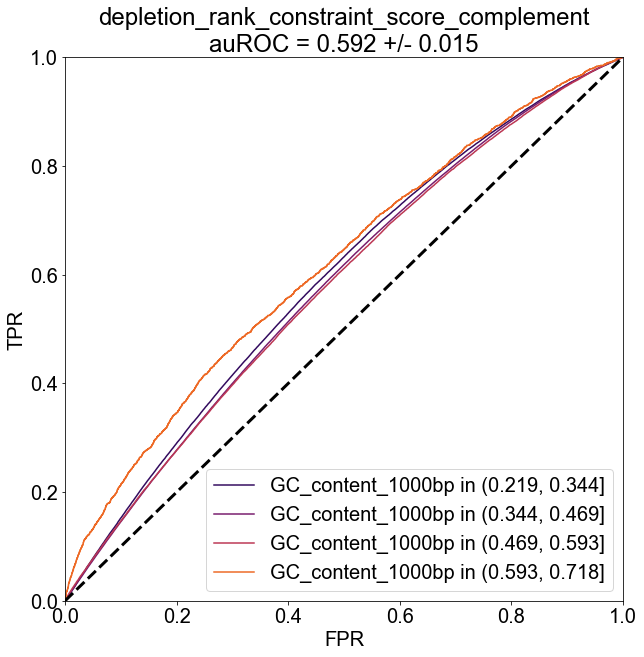

conditioning on B_M1star.EUR in [0.23286499008030304, 0.393335989681713]
conditioning on B in [0.7765943180648358, 0.8500509136402088]
(0.148, 0.261]: 6277
(0.148, 0.261]: r = 0.011151824119802454; precision = 0.014285714285714285; precision/r = 1.2810204081632652; FDR = 0.9857142857142858; FDR/(1-r) = 0.9968307671062625
(0.261, 0.374]: 678151
(0.261, 0.374]: r = 0.011150908868378872; precision = 0.016958639991707266; precision/r = 1.5208302921206391; FDR = 0.9830413600082928; FDR/(1-r) = 0.9941267771033879
(0.374, 0.486]: 700166
(0.374, 0.486]: r = 0.011151641182233928; precision = 0.01793804222226298; precision/r = 1.6085562590411093; FDR = 0.982061957777737; FDR/(1-r) = 0.9931370659823486
(0.486, 0.598]: 70210
(0.486, 0.598]: r = 0.011138014527845037; precision = 0.02066051025199562; precision/r = 1.8549545074074327; FDR = 0.9793394897480043; FDR/(1-r) = 0.9903702479577027
(0.598, 0.711]: 3738
(0.711, 0.823]: 10


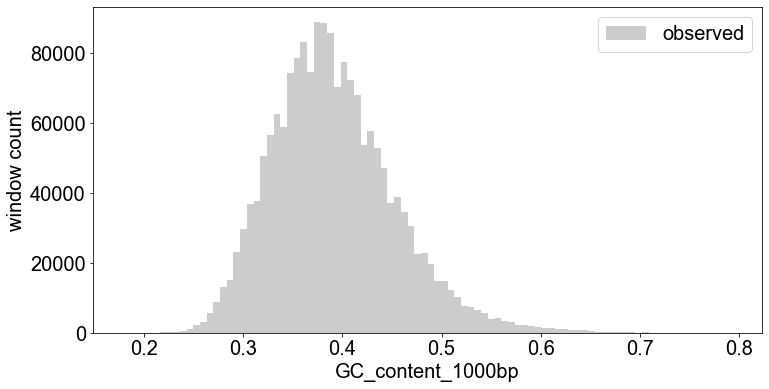

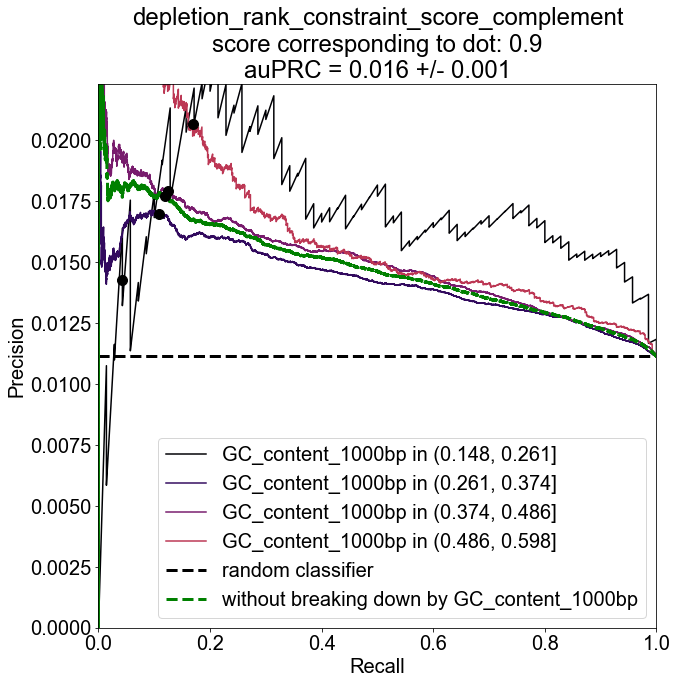

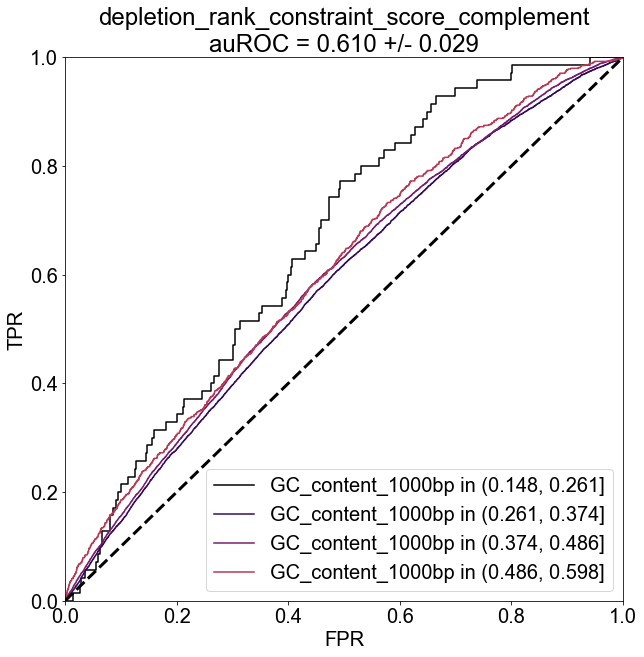

(0.224, 0.318]: 3457
(0.318, 0.41]: 27332
(0.318, 0.41]: r = 0.09629738036001756; precision = 0.10538434289762663; precision/r = 1.094363548661828; FDR = 0.8946156571023733; FDR/(1-r) = 0.9899447425069663
(0.41, 0.503]: 13774
(0.41, 0.503]: r = 0.09626833163932046; precision = 0.11203319502074689; precision/r = 1.1637595989560843; FDR = 0.8879668049792531; FDR/(1-r) = 0.9825558139286819
(0.503, 0.596]: 1800
(0.596, 0.688]: 82


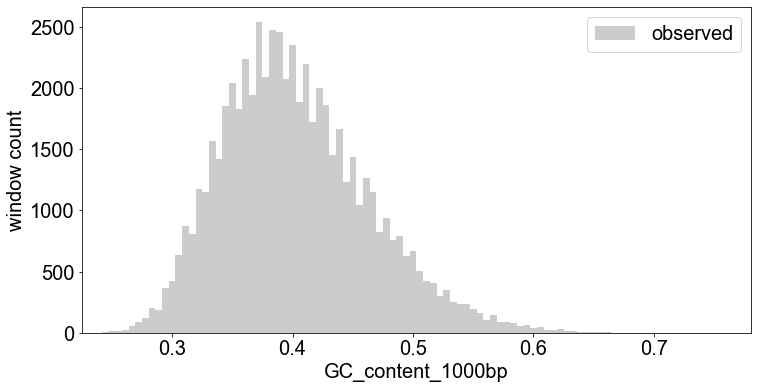

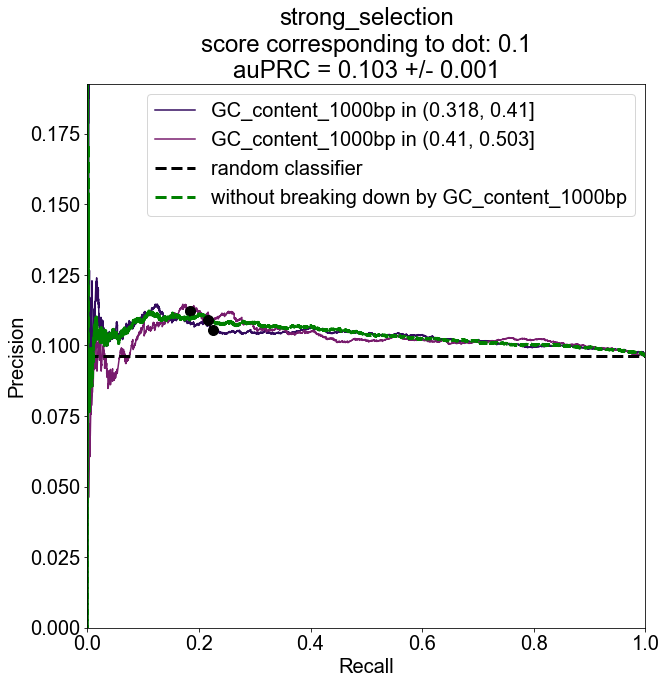

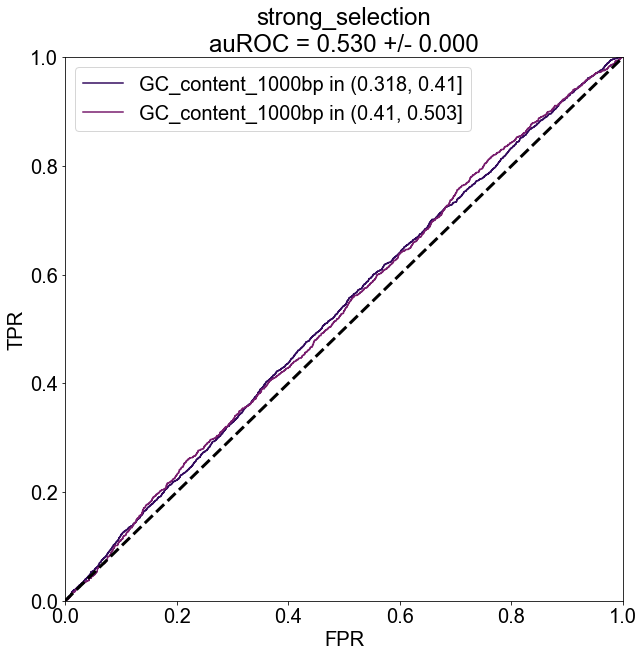

/uufs/chpc.utah.edu/common/HIPAA/u6018199/.conda/envs/constraint-tools/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/uufs/chpc.utah.edu/common/HIPAA/u6018199/.conda/envs/constraint-tools/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/uufs/chpc.utah.edu/common/HIPAA/u6018199/.conda/envs/constraint-tools/lib/python3.9/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/uufs/chpc.utah.edu/common/HIPAA/u6018199/.conda/envs/constraint-tools/lib/python3.9/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/uufs/chpc.utah.edu/common/HIPAA/u6018199/.conda/envs/constraint-tools/lib/python3.9/sit

conditioning on B_M1star.EUR in [0.23441480451659485, 0.3933175977899846]
conditioning on B in [0.7832606434446999, 0.8537524162259117]
(0.234, 0.301]: 71
(0.301, 0.368]: 764
(0.368, 0.434]: 960
(0.434, 0.5]: 308
(0.5, 0.567]: 44
(0.567, 0.633]: 9


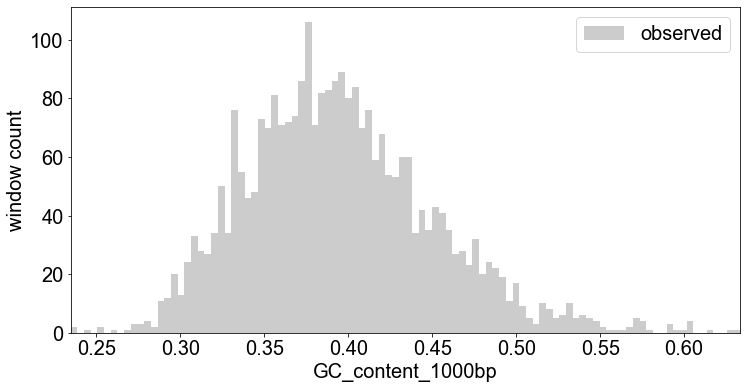

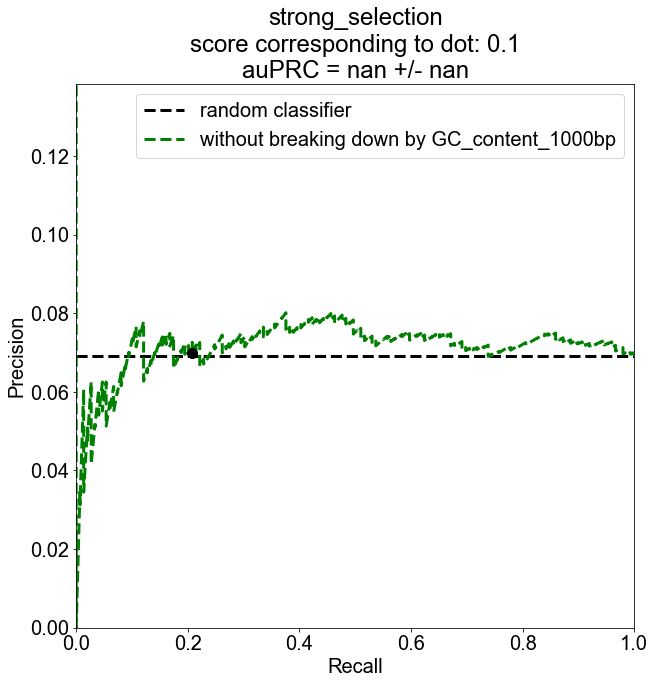

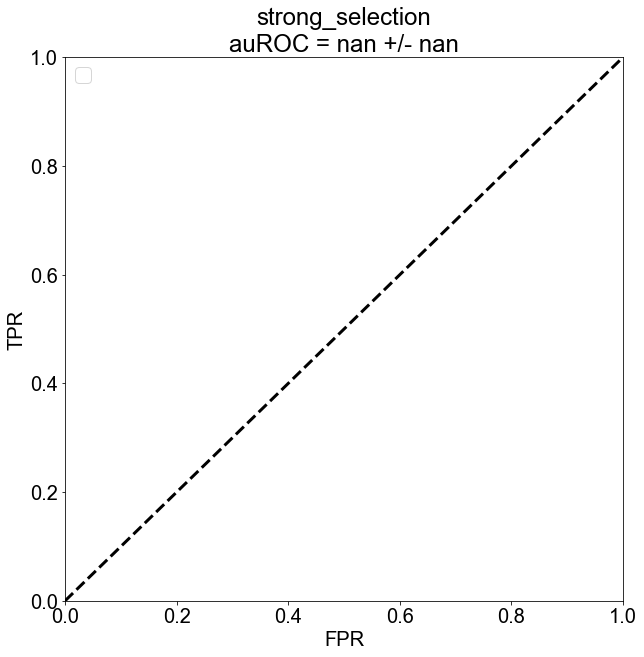

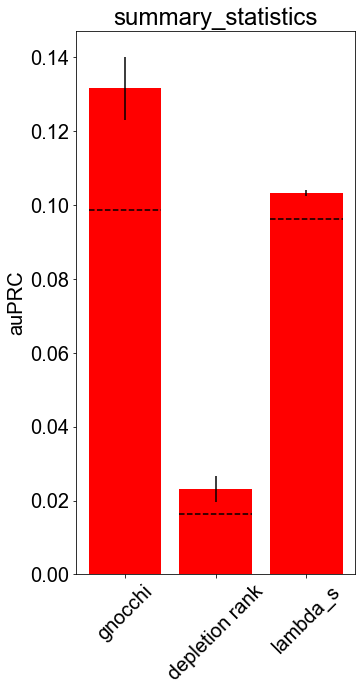

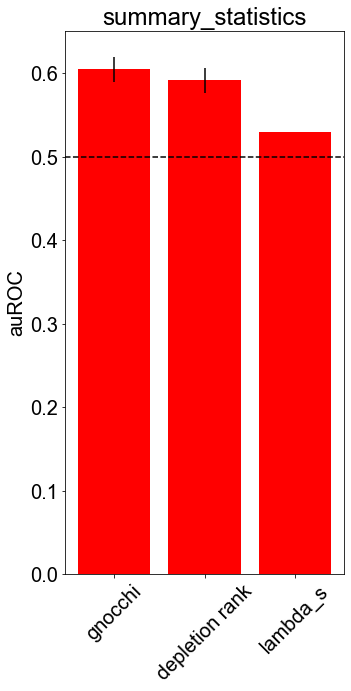

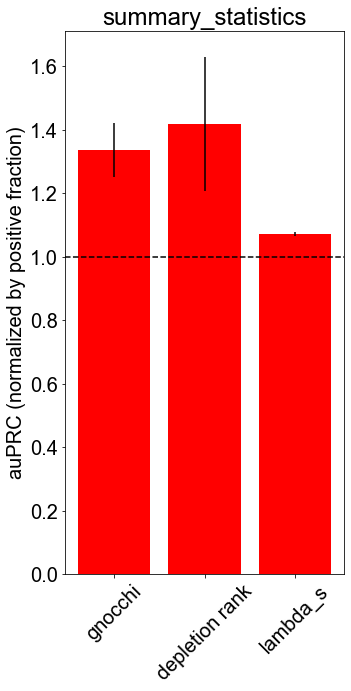

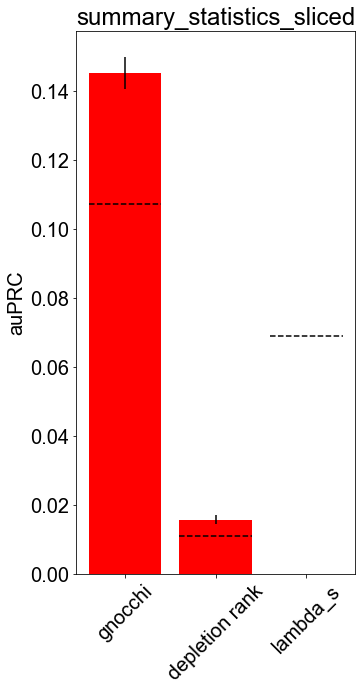

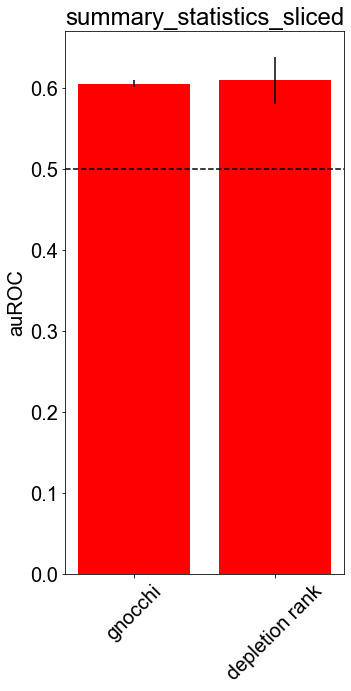

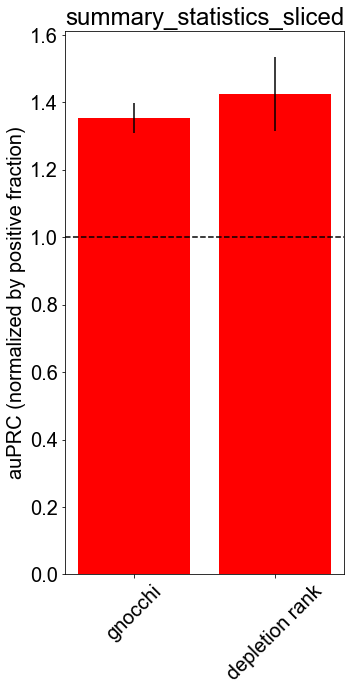

[{'summary_statistics': {'auPRC_(0.212, 0.313]': 0.1427113171742273,
   'auPRCnorm_(0.212, 0.313]': 1.4491246903244952,
   'auROC_(0.212, 0.313]': 0.6241242129569868,
   'auPRC_(0.313, 0.412]': 0.13621343117393955,
   'auPRCnorm_(0.313, 0.412]': 1.3831569874753353,
   'auROC_(0.313, 0.412]': 0.6151729676472195,
   'auPRC_(0.412, 0.512]': 0.12681270812800438,
   'auPRCnorm_(0.412, 0.512]': 1.2877355879737524,
   'auROC_(0.412, 0.512]': 0.5918727165646642,
   'auPRC_(0.512, 0.612]': 0.12057877359917896,
   'auPRCnorm_(0.512, 0.612]': 1.2245263291862565,
   'auROC_(0.512, 0.612]': 0.5894081682582029,
   'auPRC': 0.13011683373885072,
   'r': 0.09847854356306893,
   'mean_auPRC': 0.13157905751883753,
   'std_auPRC': 0.008501896215532111,
   'mean_auPRCnorm': 1.3361358987399599,
   'std_auPRCnorm': 0.08627968461321302,
   'mean_auROC': 0.6051445163567684,
   'std_auROC': 0.014870877912233507},
  'summary_statistics_sliced': {'auPRC_(0.322, 0.409]': 0.1499114458268039,
   'auPRCnorm_(0.322, 0

In [13]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc

def plot_random_classifier(df, target, type_, color, ax):
    r = compute_positive_fraction(df, target)
    if type_ == 'precision': 
        ys = [r, r] 
    elif type_ == 'FDR':
        ys = [1-r, 1-r]
    else: 
        raise ValueError(f'invalid type: {type_}')
    ax.plot([0, 1], ys, linestyle='--', linewidth=3, color=color, label='random classifier') 
  
def plot_pr_curve_single_bin(ax, type_, precision, recall, pr_thresholds, df_bin, target, feature, feature_bin, constraint_score_to_plot, color):
    FDR = 1 - precision

    if type_ == 'precision': 
        ys = precision
    elif type_ == 'FDR':
        ys = FDR
    else:
        raise ValueError(f'invalid type: {type_}')
    
    ax.plot(recall, ys, color=color, linestyle='-', label=f'{feature} in {feature_bin}') 
    closest_score_idx = np.argmin(np.abs(pr_thresholds - constraint_score_to_plot))
    # Plot the point on the PR curve corresponding to a threshold closest to given constraint score
    ax.plot(recall[closest_score_idx], ys[closest_score_idx], 'ko', markersize=10, label=None) 
    
    precision = precision[closest_score_idx]
    FDR = 1 - precision
    r = compute_positive_fraction(df_bin, target)
    print(f'{feature_bin}: r = {r}; precision = {precision}; precision/r = {precision/r}; FDR = {FDR}; FDR/(1-r) = {FDR/(1-r)}')

def plot_roc_curve_single_bin(ax, fpr, tpr, color, feature, feature_bin):
    ax.plot(fpr, tpr, color=color, linestyle='-', label=f'{feature} in {feature_bin}')

def finish_pr_curve(ax, type_, constraint_score, constraint_score_to_plot, summary_statistics): 
    ax.grid(False)
    ax.legend()
    ax.set_xlabel('Recall')
    if type_ == 'precision':
        ylabel = 'Precision'
    elif type_ == 'FDR':
        ylabel = 'FDR'
    else:
        raise ValueError(f'invalid type: {type_}')
    ax.set_ylabel(ylabel) 
    ax.set_xlim(0, 1)
    r = summary_statistics['r']
    if type_ == 'precision':
        ylim = (0, 2*r)
    elif type_ == 'FDR':
        ylim = (0, 2*(1-r))
    else: 
        raise ValueError(f'invalid type: {type_}')
    ax.set_ylim(ylim) # type: ignore
    ax.set_title(
        f'{constraint_score}\n'
        f'score corresponding to dot: {constraint_score_to_plot}\n'
        f'auPRC = {summary_statistics["mean_auPRC"]:.3f} +/- {summary_statistics["std_auPRC"]:.3f}'
    )

def finish_roc_curve(ax, constraint_score, summary_statistics):
    ax.grid(False)
    ax.legend()
    ax.set_xlabel('FPR')
    ax.set_ylabel('TPR') 
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_title(
        f'{constraint_score}\n'
        f'auROC = {summary_statistics["mean_auROC"]:.3f} +/- {summary_statistics["std_auROC"]:.3f}'
    )

def plot_curves_all_bins(df, type_, feature, number_bins, constraint_score, target, constraint_score_to_plot): 
    plot_feature_distribution(df, feature, xlabel=feature, density=False)
    
    df = preprocess(df, feature, target, number_bins)

    _, ax_pr = plt.subplots(figsize=(10, 10))
    _, ax_roc = plt.subplots(figsize=(10, 10))

    cmap = cm.get_cmap('inferno')

    summary_statistics = {}

    for i, feature_bin in enumerate(sorted(df[f'{feature}_bin'].unique())): 
        df_bin = df[df[f'{feature}_bin'] == feature_bin]
        print(f'{feature_bin}: {len(df_bin)}')
        if len(df_bin) < 4000: continue
        color = cmap(i / number_bins)
        targets, scores = df_bin[target], df_bin[constraint_score]        
        precision, recall, pr_thresholds = precision_recall_curve(targets, scores)
        fpr, tpr, _ = roc_curve(targets, scores)
        summary_statistics[f'auPRC_{feature_bin}'] = auc(recall, precision)
        summary_statistics[f'auPRCnorm_{feature_bin}'] = auc(recall, precision)/compute_positive_fraction(df_bin, target)
        summary_statistics[f'auROC_{feature_bin}'] = auc(fpr, tpr)
        plot_pr_curve_single_bin(ax_pr, type_, precision, recall, pr_thresholds, df_bin, target, feature, feature_bin, constraint_score_to_plot, color)
        plot_roc_curve_single_bin(ax_roc, fpr, tpr, color, feature, feature_bin)

    plot_random_classifier(
        df, 
        target, 
        type_=type_,
        color='black', 
        ax=ax_pr,
    )
    ax_roc.plot([0, 1], [0, 1], linewidth=3, linestyle='--', color='black')

    # plot PR curve of classifier without breaking down by feature
    targets, scores = df[target], df[constraint_score]
    precision, recall, thresholds = precision_recall_curve(targets, scores)
    FDR = 1 - precision

    # Compute and return auPRC
    summary_statistics['auPRC'] = auc(recall, precision)

    summary_statistics['r'] = compute_positive_fraction(df, target)

    if type_ == 'precision': 
        ys = precision
    elif type_ == 'FDR':
        ys = FDR
    else:
        raise ValueError(f'invalid type: {type_}')
    ax_pr.plot(recall, ys, color='green', linewidth=3, linestyle='--', label=f'without breaking down by {feature}') 

    closest_score_idx = np.argmin(np.abs(thresholds - constraint_score_to_plot))
    # Plot the point on the PR curve corresponding to a threshold closest to given constraint score
    ax_pr.plot(recall[closest_score_idx], ys[closest_score_idx], 'ko', markersize=10, label=None) 

    summary_statistics = compute_mean_and_std_area_under_curve(summary_statistics, 'PRC')
    summary_statistics = compute_mean_and_std_area_under_curve(summary_statistics, 'PRCnorm')
    summary_statistics = compute_mean_and_std_area_under_curve(summary_statistics, 'ROC')

    finish_pr_curve(ax_pr, type_, constraint_score, constraint_score_to_plot, summary_statistics)
    finish_roc_curve(ax_roc, constraint_score, summary_statistics)

    plt.show()

    return summary_statistics

def compute_mean_and_std_area_under_curve(summary_statistics, curve_type): 
    areas = [v for k, v in summary_statistics.items() if k.startswith(f'au{curve_type}_')]
    summary_statistics[f'mean_au{curve_type}'] = np.mean(areas) 
    summary_statistics[f'std_au{curve_type}'] = np.std(areas) 
    return summary_statistics

def check_r_value(list_of_summary_statistics):
    r_value = list_of_summary_statistics[0]['r']  # get the 'r' value of the first item
    for summary_statistics in list_of_summary_statistics:
        if summary_statistics['r'] != r_value:
            return False
    return True

def plot_auROC(list_of_ds, type_): 
    fig, ax = plt.subplots(figsize=(5, 10))
    bars = ax.bar(
        [d['name'] for d in list_of_ds], 
        [d[type_][f'mean_auROC'] for d in list_of_ds], 
        yerr=[d[type_][f'std_auROC'] for d in list_of_ds], 
        color=[d['auROC_color'] for d in list_of_ds]
    )
    plt.axhline(y=0.5, color='black', linestyle='--')
    ax.set_ylabel('auROC')
    ax.xaxis.set_tick_params(rotation=45)
    ax.set_title(type_)
    plt.show() 

def plot_auPRC(list_of_ds, type_): 
    rs = [d[type_]['r'] for d in list_of_ds]

    fig, ax = plt.subplots(figsize=(5, 10))
    bars = ax.bar(
        [d['name'] for d in list_of_ds], 
        [d[type_]['mean_auPRC'] for d in list_of_ds], 
        yerr=[d[type_]['std_auPRC'] for d in list_of_ds], 
        color=[d['auPRC_color'] for d in list_of_ds]
    )
    # Plot horizontal lines corresponding to each bar
    for bar, r in zip(bars, rs):
        bar_x = bar.get_x()
        bar_width = bar.get_width()
        plt.plot([bar_x, bar_x + bar_width], [r, r], color='black', linestyle='--')
    ax.set_ylabel('auPRC')
    ax.xaxis.set_tick_params(rotation=45)
    ax.set_title(type_)
    plt.show()

def plot_auPRCnorm(list_of_ds, type_): 
    # https://genomebiology.biomedcentral.com/articles/10.1186/s13059-021-02568-9
    fig, ax = plt.subplots(figsize=(5, 10))
    bars = ax.bar(
        [d['name'] for d in list_of_ds], 
        [d[type_]['mean_auPRCnorm'] for d in list_of_ds], 
        yerr=[d[type_]['std_auPRCnorm'] for d in list_of_ds], 
        color=[d['auPRCnorm_color'] for d in list_of_ds]
    )
    plt.axhline(y=1, color='black', linestyle='--')
    ax.set_ylabel('auPRC (normalized by positive fraction)')
    ax.xaxis.set_tick_params(rotation=45)
    ax.set_title(type_)
    plt.show()

def plot_curves_with_and_without_slicing(
    df, 
    gc_window_size, 
    feature, 
    number_bins, 
    constraint_score, 
    constraint_score_alias,
    constraint_score_to_plot,
    auPRC_color,
    auPRCnorm_color,
    auROC_color,
    type_='precision',
    target='window overlaps enhancer', 
): 
    assert feature in [f for f, _, _, _ in get_features_and_lims_and_labels(df, gc_window_size)]

    summary_statistics = plot_curves_all_bins(df, type_, feature, number_bins, constraint_score, target, constraint_score_to_plot)

    conditional_features_and_center_lims = [
        (f, cl) for f, cl, _, _ in get_features_and_lims_and_labels(df, gc_window_size) if f != feature
    ]
    df_sliced = slice_feature_space(df, conditional_features_and_center_lims)
    summary_statistics_sliced = plot_curves_all_bins(df_sliced, type_, feature, number_bins, constraint_score, target, constraint_score_to_plot)

    d = {
        'summary_statistics': summary_statistics,
        'summary_statistics_sliced': summary_statistics_sliced,
        'name': constraint_score_alias,
        'auPRC_color': auPRC_color,
        'auPRCnorm_color': auPRCnorm_color,
        'auROC_color': auROC_color,
    }

    return d

def plot_area_under_curve_wrapper(gc_window_size, feature, number_bins): 
    list_of_ds = []

    list_of_ds.append(plot_curves_with_and_without_slicing(
        CHEN_WINDOWS,
        gc_window_size, 
        feature, 
        number_bins, 
        constraint_score='gnocchi', 
        constraint_score_alias='gnocchi',
        constraint_score_to_plot=2, 
        auPRC_color='red',
        auPRCnorm_color='red',
        auROC_color='red'
    ))

    list_of_ds.append(plot_curves_with_and_without_slicing(
        HALLDORSSON_WINDOWS,
        gc_window_size, 
        feature, 
        number_bins, 
        constraint_score='depletion_rank_constraint_score_complement',
        constraint_score_alias='depletion rank',
        constraint_score_to_plot=0.9, 
        auPRC_color='red',
        auPRCnorm_color='red',
        auROC_color='red'
    ))

    list_of_ds.append(plot_curves_with_and_without_slicing(
        CHEN_WINDOWS_WITH_LAMBDA_S, 
        gc_window_size, 
        feature, 
        number_bins, 
        constraint_score='strong_selection',
        constraint_score_alias='lambda_s',
        constraint_score_to_plot=0.1, 
        auPRC_color='red',
        auPRCnorm_color='red',
        auROC_color='red'
    ))

    plot_auPRC(list_of_ds, type_='summary_statistics')
    plot_auROC(list_of_ds, type_='summary_statistics')
    plot_auPRCnorm(list_of_ds, type_='summary_statistics')

    plot_auPRC(list_of_ds, type_='summary_statistics_sliced')
    plot_auROC(list_of_ds, type_='summary_statistics_sliced')
    plot_auPRCnorm(list_of_ds, type_='summary_statistics_sliced')

    return list_of_ds 

plot_area_under_curve_wrapper(
    gc_window_size=1000,
    feature='GC_content_1000bp',
    number_bins=6,
)

(0.536, 0.613]: 80750
(0.536, 0.613]: r = 0.28175851393188855; precision = 0.4029562361124529; precision/r = 1.4301475064205595; FDR = 0.5970437638875471; FDR/(1-r) = 0.8312576974019695
(0.613, 0.689]: 73197
(0.613, 0.689]: r = 0.2817601814282006; precision = 0.4184591317950723; precision/r = 1.4851606414858374; FDR = 0.5815408682049277; FDR/(1-r) = 0.8096750600117187
(0.689, 0.766]: 117718
(0.689, 0.766]: r = 0.28175809986578093; precision = 0.4469250560212466; precision/r = 1.586201270643666; FDR = 0.5530749439787535; FDR/(1-r) = 0.7700399320554807
(0.766, 0.843]: 197411
(0.766, 0.843]: r = 0.28176241445512157; precision = 0.4783932162852639; precision/r = 1.6978602955628108; FDR = 0.5216067837147361; FDR/(1-r) = 0.7262315342617837
(0.843, 0.919]: 294522
(0.843, 0.919]: r = 0.28176163410543187; precision = 0.46745138843727646; precision/r = 1.6590313650096227; FDR = 0.5325486115627236; FDR/(1-r) = 0.7414650022203042
(0.919, 0.996]: 201638
(0.919, 0.996]: r = 0.28176236622065287; prec

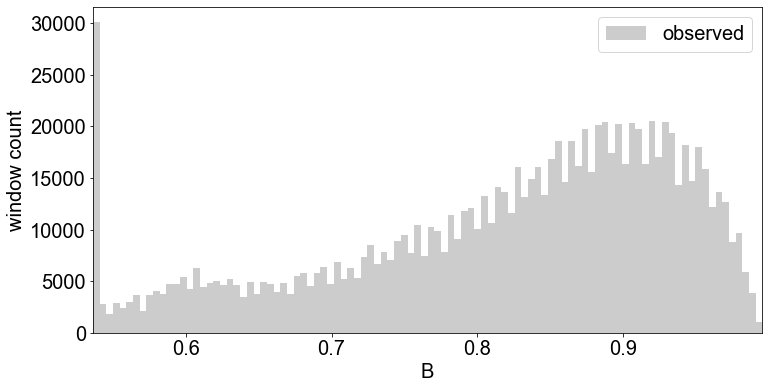

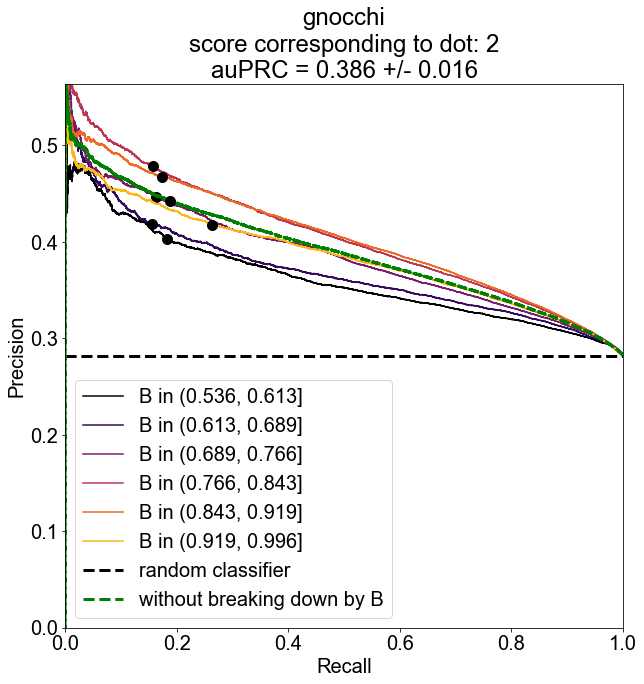

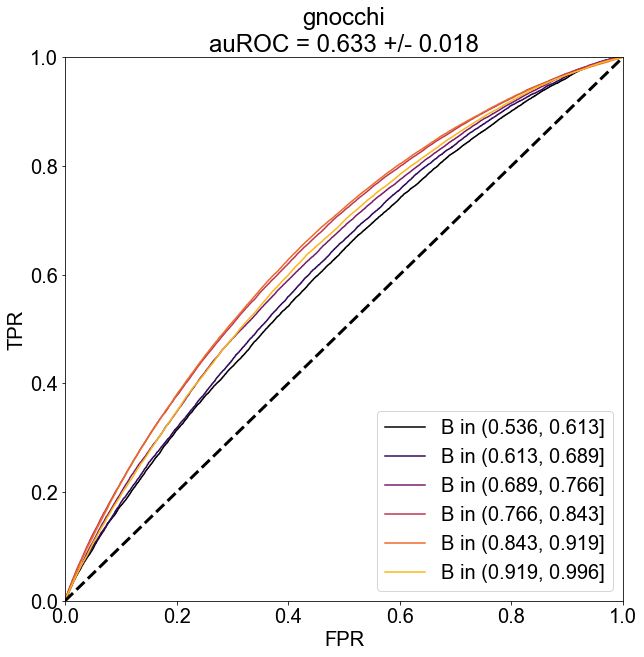

conditioning on GC_content_1000bp in [0.38558346066943017, 0.42231631769777855]
conditioning on B_M1star.EUR in [0.23484766553012815, 0.39348785122344543]
(0.536, 0.612]: 4597
(0.536, 0.612]: r = 0.2932347182945399; precision = 0.34292035398230086; precision/r = 1.1694398125049237; FDR = 0.6570796460176991; FDR/(1-r) = 0.9296999485205794
(0.612, 0.689]: 4183
(0.612, 0.689]: r = 0.2930910829548171; precision = 0.40703517587939697; precision/r = 1.388766835810373; FDR = 0.592964824120603; FDR/(1-r) = 0.8388136149125743
(0.689, 0.766]: 6790
(0.689, 0.766]: r = 0.2932253313696613; precision = 0.3806343906510851; precision/r = 1.2980951845910937; FDR = 0.6193656093489148; FDR/(1-r) = 0.8763268363157183
(0.766, 0.842]: 11176
(0.766, 0.842]: r = 0.29321760916249107; precision = 0.3829113924050633; precision/r = 1.3058949409578844; FDR = 0.6170886075949367; FDR/(1-r) = 0.8730956169744287
(0.842, 0.919]: 16386
(0.842, 0.919]: r = 0.2932381301110704; precision = 0.41601255886970173; precision/r 

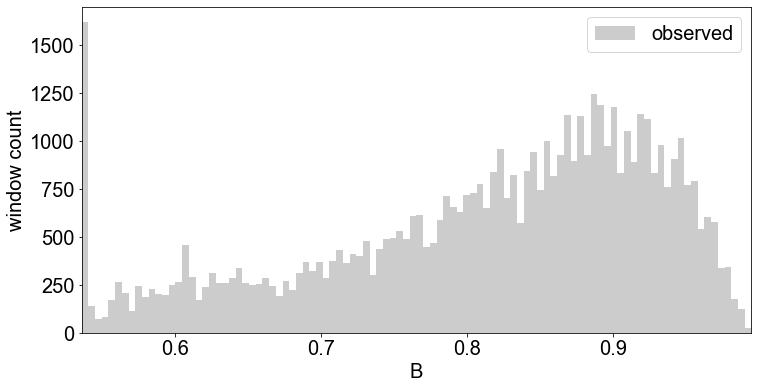

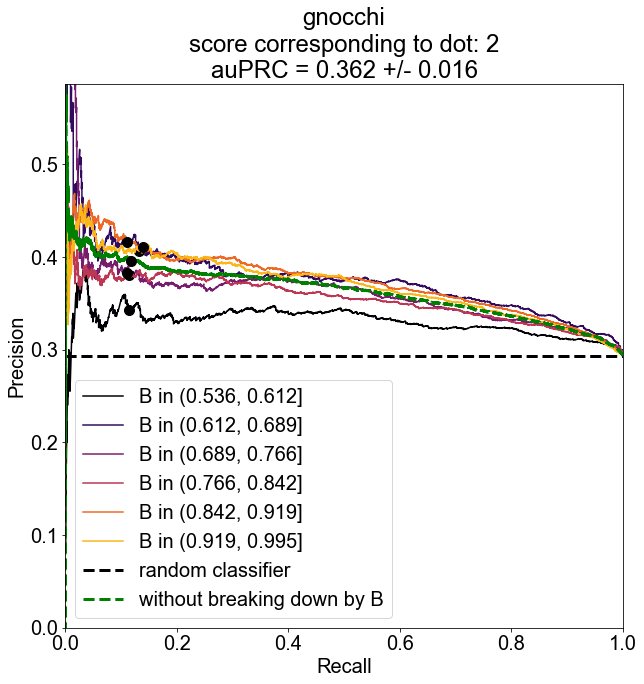

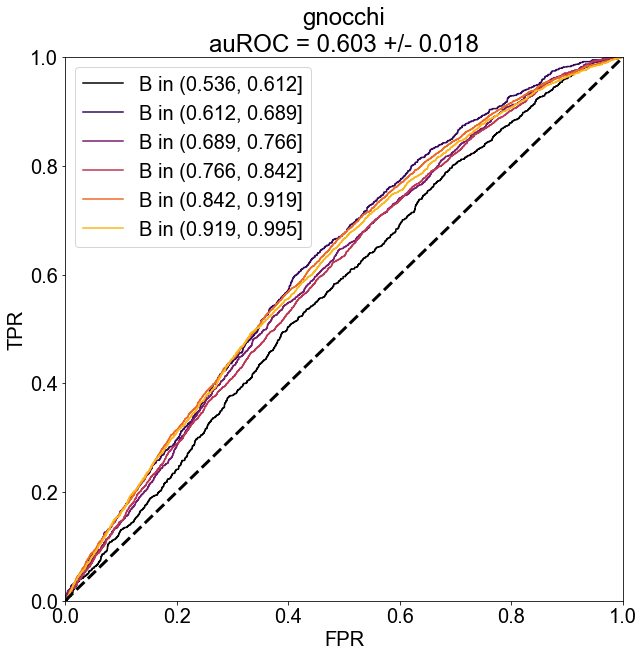

(0.536, 0.613]: 3595217
(0.536, 0.613]: r = 0.1911650951806247; precision = 0.253866756015256; precision/r = 1.3279974347586145; FDR = 0.746133243984744; FDR/(1-r) = 0.922479036870159
(0.613, 0.69]: 3065024
(0.613, 0.69]: r = 0.19116522415485165; precision = 0.25892880453228206; precision/r = 1.354476504170754; FDR = 0.7410711954677179; FDR/(1-r) = 0.9162207382754722
(0.69, 0.766]: 4626632
(0.69, 0.766]: r = 0.19116519316859434; precision = 0.27415326276315144; precision/r = 1.4341170493384088; FDR = 0.7258467372368486; FDR/(1-r) = 0.8973979990801073
(0.766, 0.843]: 7556193
(0.766, 0.843]: r = 0.19116531300881276; precision = 0.28570726183263495; precision/r = 1.4945559805583757; FDR = 0.714292738167365; FDR/(1-r) = 0.8831133847937307
(0.843, 0.92]: 11077368
(0.843, 0.92]: r = 0.19116526597292788; precision = 0.2837136508863264; precision/r = 1.4841276182803254; FDR = 0.7162863491136736; FDR/(1-r) = 0.8855781273726793
(0.92, 0.997]: 7691226
(0.92, 0.997]: r = 0.1911652316548753; precis

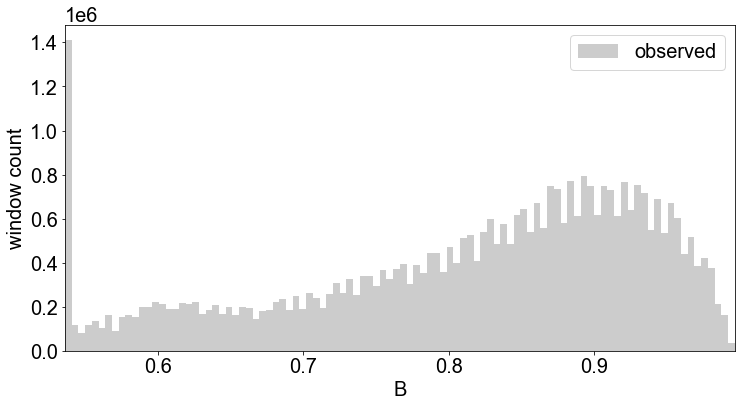

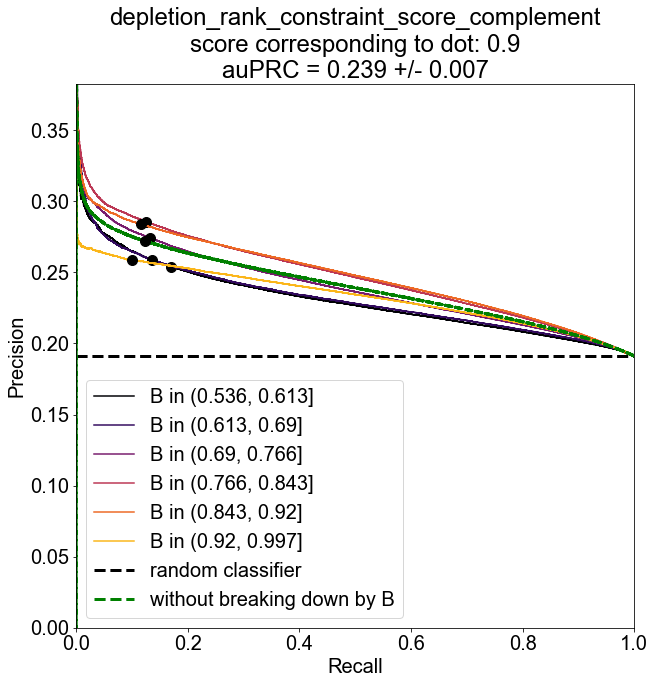

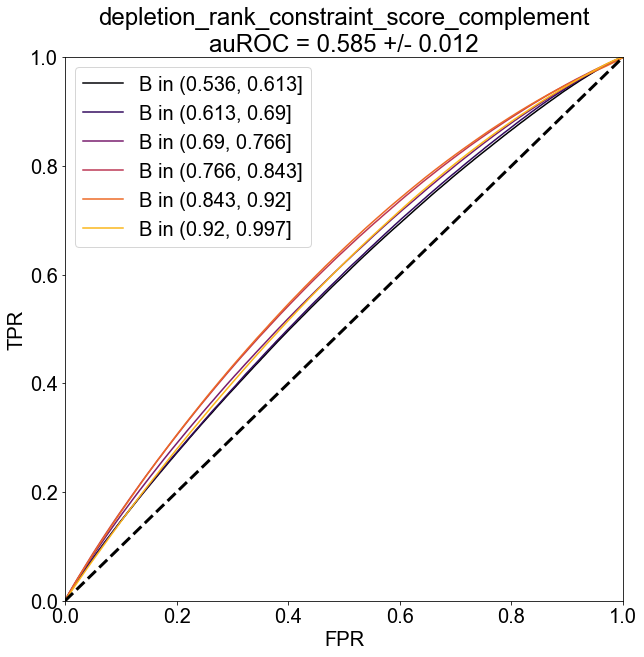

conditioning on GC_content_1000bp in [0.3802793985505721, 0.42073419235976744]
conditioning on B_M1star.EUR in [0.23286499008030304, 0.393335989681713]
(0.536, 0.613]: 225907
(0.536, 0.613]: r = 0.19650121510178967; precision = 0.23840940226404211; precision/r = 1.2132718982961177; FDR = 0.7615905977359578; FDR/(1-r) = 0.9478428742520605
(0.613, 0.689]: 178773
(0.613, 0.689]: r = 0.1965005901338569; precision = 0.2709710803196688; precision/r = 1.3789835447063155; FDR = 0.7290289196803312; FDR/(1-r) = 0.9073173056863625
(0.689, 0.766]: 275832
(0.689, 0.766]: r = 0.19650366889991008; precision = 0.2601502673024129; precision/r = 1.3238952166074898; FDR = 0.739849732697587; FDR/(1-r) = 0.9207879414765187
(0.766, 0.843]: 438828
(0.766, 0.843]: r = 0.1965029578787133; precision = 0.2658539888934038; precision/r = 1.352926143012543; FDR = 0.7341460111065963; FDR/(1-r) = 0.9136885048990361
(0.843, 0.919]: 639389
(0.843, 0.919]: r = 0.19650322417182653; precision = 0.27488598836295014; precis

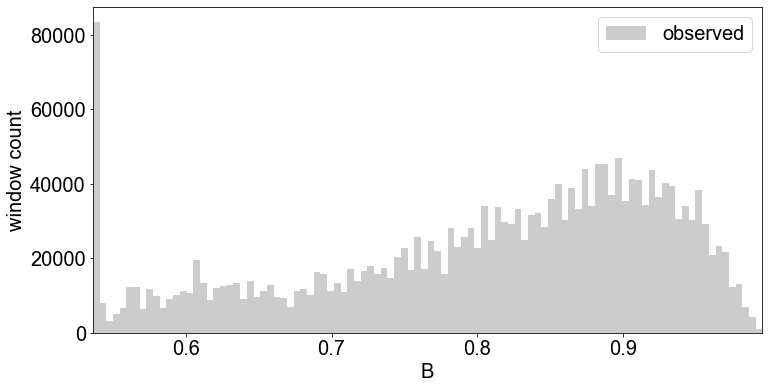

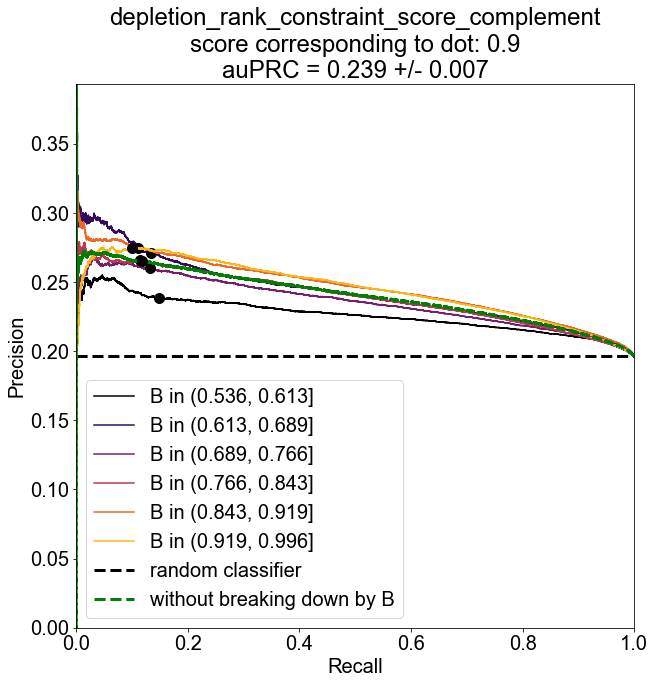

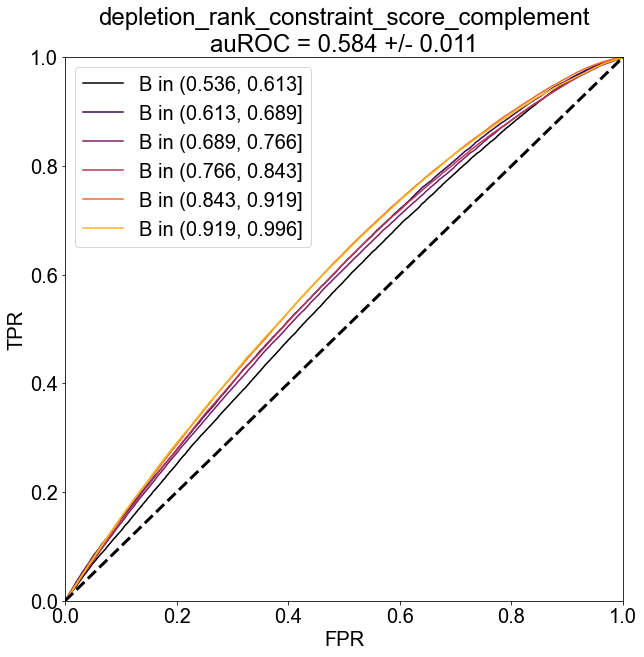

(0.536, 0.612]: 4689
(0.536, 0.612]: r = 0.27212625293239495; precision = 0.27440633245382584; precision/r = 1.0083787561724056; FDR = 0.7255936675461742; FDR/(1-r) = 0.9968674793800206
(0.612, 0.689]: 4351
(0.612, 0.689]: r = 0.27212135141346816; precision = 0.2576112412177986; precision/r = 0.946677796063042; FDR = 0.7423887587822013; FDR/(1-r) = 1.0199347930095857
(0.689, 0.766]: 6873
(0.689, 0.766]: r = 0.27207915029826857; precision = 0.29451540195341847; precision/r = 1.082462223329329; FDR = 0.7054845980465816; FDR/(1-r) = 0.96917762190169
(0.766, 0.842]: 12255
(0.766, 0.842]: r = 0.27213382292941657; precision = 0.3004905968928863; precision/r = 1.104201578687353; FDR = 0.6995094031071136; FDR/(1-r) = 0.9610412259055693
(0.842, 0.919]: 17402
(0.842, 0.919]: r = 0.27209516147569246; precision = 0.28851540616246496; precision/r = 1.0603474335880074; FDR = 0.711484593837535; FDR/(1-r) = 0.977441770108217
(0.919, 0.995]: 12095
(0.919, 0.995]: r = 0.272095907399752; precision = 0.29

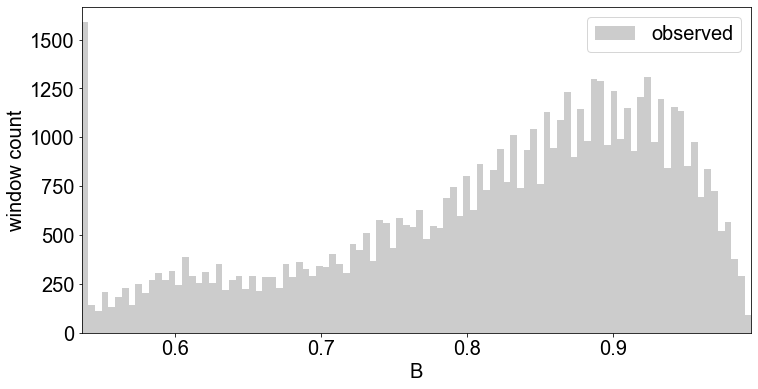

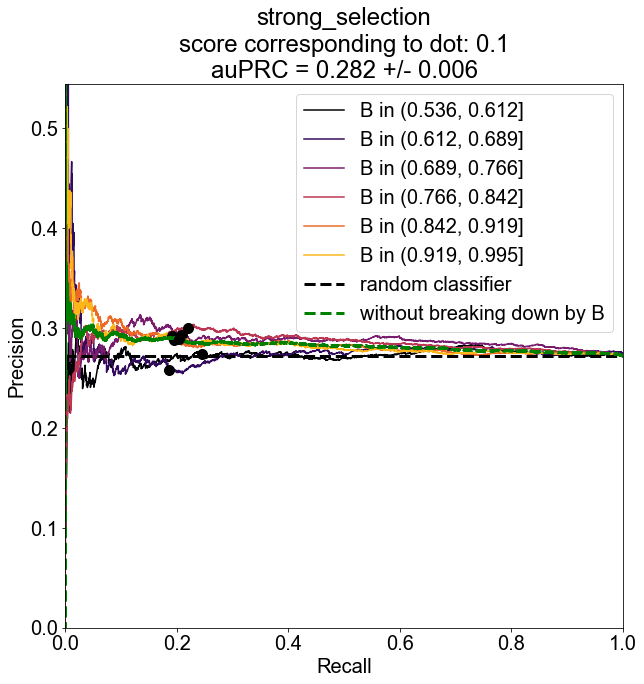

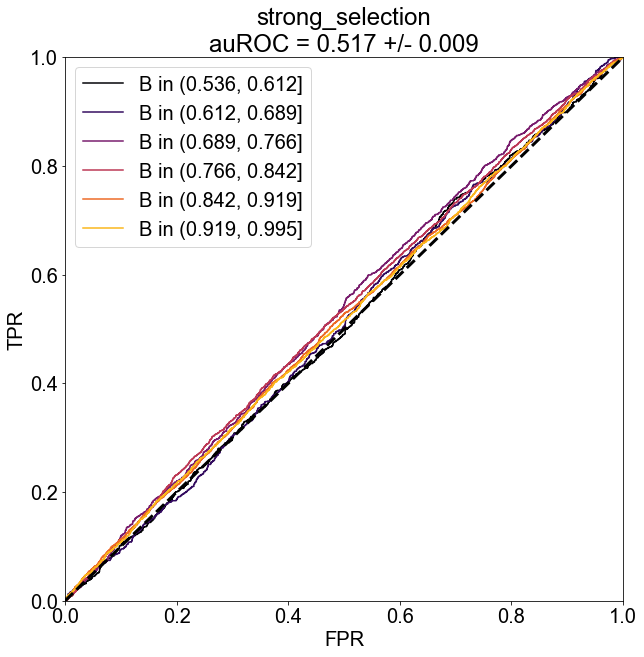

/uufs/chpc.utah.edu/common/HIPAA/u6018199/.conda/envs/constraint-tools/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/uufs/chpc.utah.edu/common/HIPAA/u6018199/.conda/envs/constraint-tools/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/uufs/chpc.utah.edu/common/HIPAA/u6018199/.conda/envs/constraint-tools/lib/python3.9/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/uufs/chpc.utah.edu/common/HIPAA/u6018199/.conda/envs/constraint-tools/lib/python3.9/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/uufs/chpc.utah.edu/common/HIPAA/u6018199/.conda/envs/constraint-tools/lib/python3.9/sit

conditioning on GC_content_1000bp in [0.3845925698686351, 0.42127553136450235]
conditioning on B_M1star.EUR in [0.23441480451659485, 0.3933175977899846]
(0.536, 0.612]: 272
(0.612, 0.687]: 297
(0.687, 0.763]: 413
(0.763, 0.839]: 607
(0.839, 0.914]: 1042
(0.914, 0.99]: 718


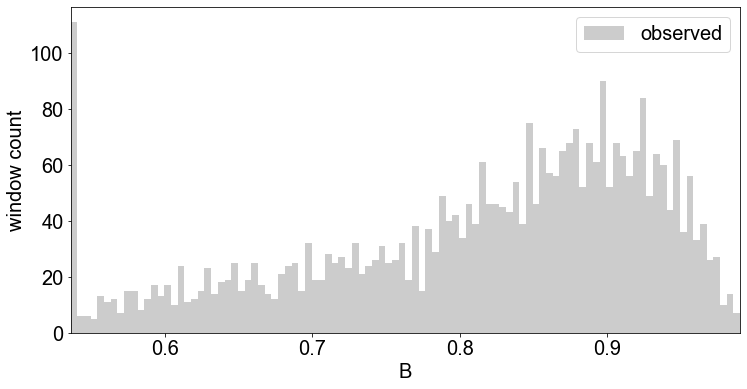

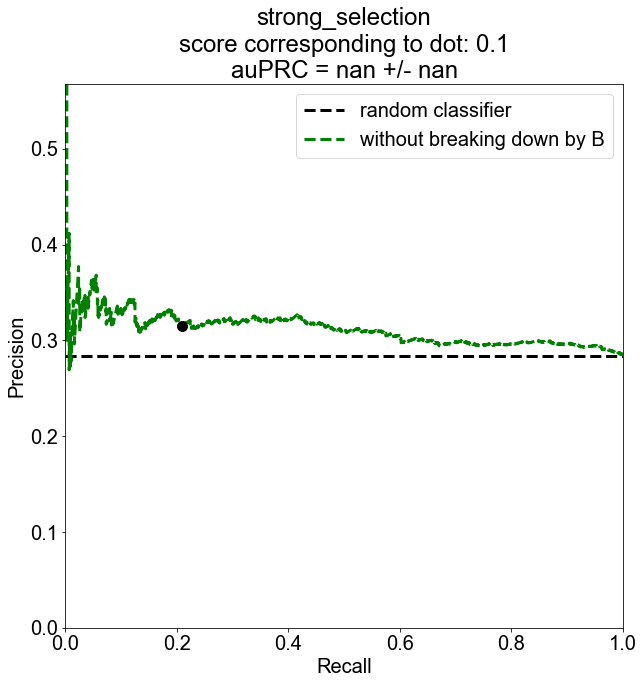

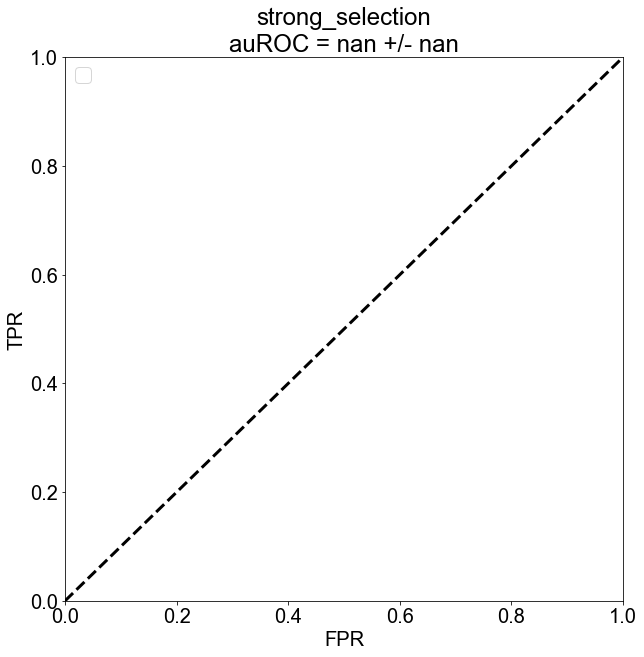

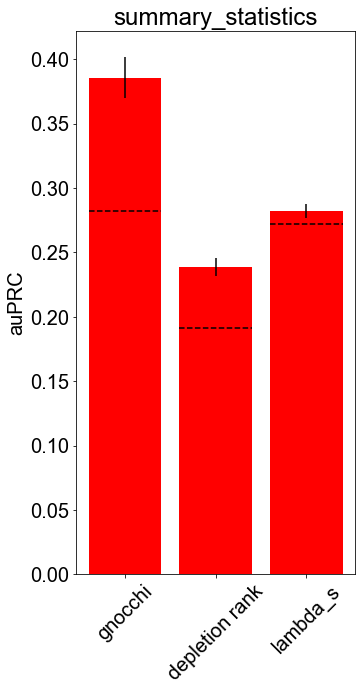

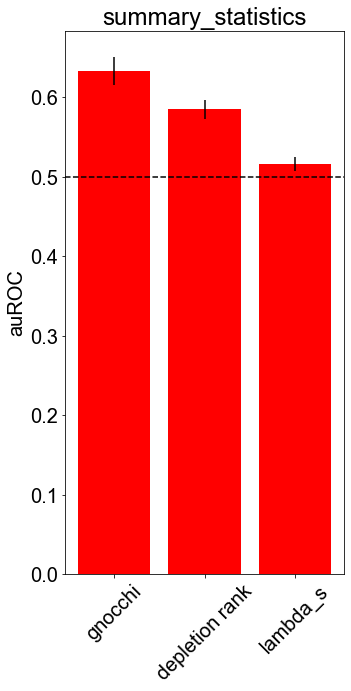

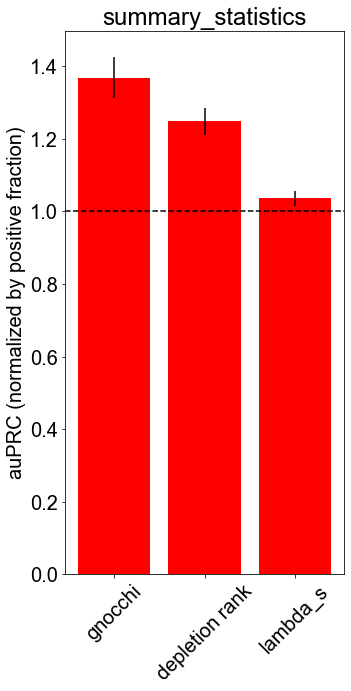

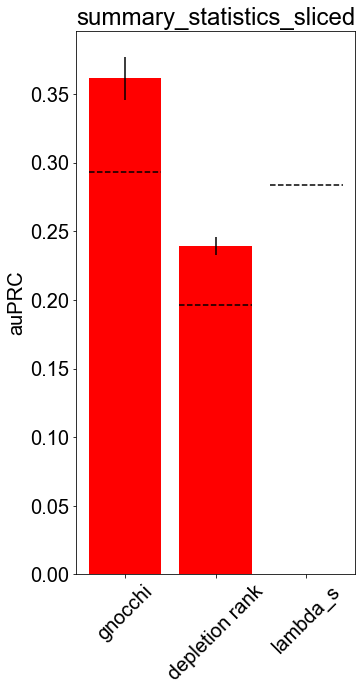

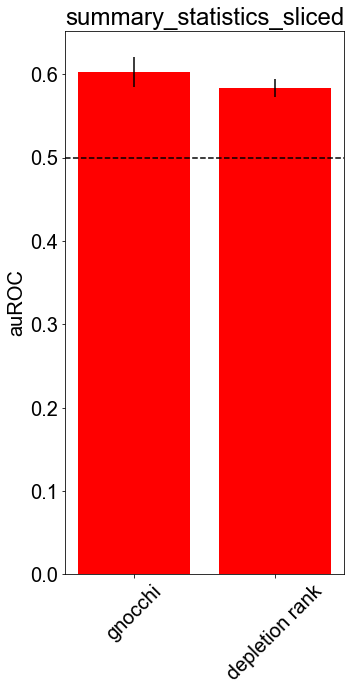

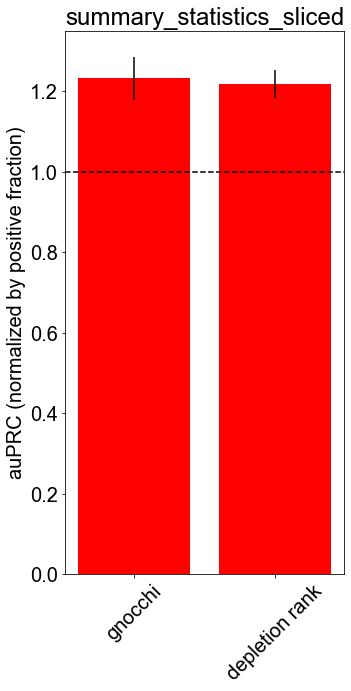

[{'summary_statistics': {'auPRC_(0.536, 0.613]': 0.362010296122584,
   'auPRCnorm_(0.536, 0.613]': 1.2848246928577118,
   'auROC_(0.536, 0.613]': 0.6058885420851361,
   'auPRC_(0.613, 0.689]': 0.37028799295004444,
   'auPRCnorm_(0.613, 0.689]': 1.3141956080277544,
   'auROC_(0.613, 0.689]': 0.6157846588120693,
   'auPRC_(0.689, 0.766]': 0.38636145898801194,
   'auPRCnorm_(0.689, 0.766]': 1.371252358573046,
   'auROC_(0.689, 0.766]': 0.6337819164368098,
   'auPRC_(0.766, 0.843]': 0.40626937409459674,
   'auPRCnorm_(0.766, 0.843]': 1.4418863313627175,
   'auROC_(0.766, 0.843]': 0.6528290339647622,
   'auPRC_(0.843, 0.919]': 0.4043882417296687,
   'auPRCnorm_(0.843, 0.919]': 1.435213999285479,
   'auROC_(0.843, 0.919]': 0.6547118859336079,
   'auPRC_(0.919, 0.996]': 0.3847906340222102,
   'auPRCnorm_(0.919, 0.996]': 1.365656596313768,
   'auROC_(0.919, 0.996]': 0.637162133833818,
   'auPRC': 0.39011242218104447,
   'r': 0.28176114442478317,
   'mean_auPRC': 0.38568466631785264,
   'std_au

In [14]:
plot_area_under_curve_wrapper(
    gc_window_size=1000,
    feature='B',
    number_bins=6,
)

(-0.663, -0.324]: 3604
(-0.324, 0.0126]: 115663
(-0.324, 0.0126]: r = 0.26976647674710147; precision = 0.4936752529898804; precision/r = 1.8300096399771983; FDR = 0.5063247470101195; FDR/(1-r) = 0.6933737371500629
(0.0126, 0.349]: 440261
(0.0126, 0.349]: r = 0.2697649803184929; precision = 0.4492064978231356; precision/r = 1.6651772120042732; FDR = 0.5507935021768644; FDR/(1-r) = 0.7542688139184199
(0.349, 0.685]: 319311
(0.349, 0.685]: r = 0.26976521322472446; precision = 0.3989093242087254; precision/r = 1.4787278146067673; FDR = 0.6010906757912746; FDR/(1-r) = 0.8231471393545867
(0.685, 1.022]: 62945
(0.685, 1.022]: r = 0.26975931368655176; precision = 0.3907608245715705; precision/r = 1.448553598507509; FDR = 0.6092391754284294; FDR/(1-r) = 0.8342991384171106
(1.022, 1.358]: 6933
(1.022, 1.358]: r = 0.2697245059858647; precision = 0.38025415444770283; precision/r = 1.4097871940031677; FDR = 0.6197458455522972; FDR/(1-r) = 0.8486466417566811
(1.358, 1.695]: 661


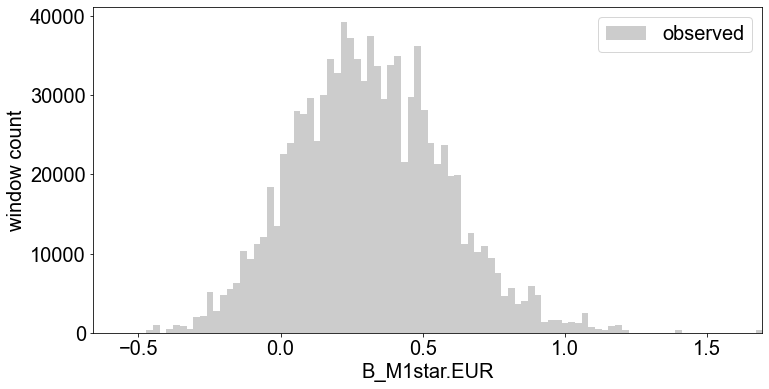

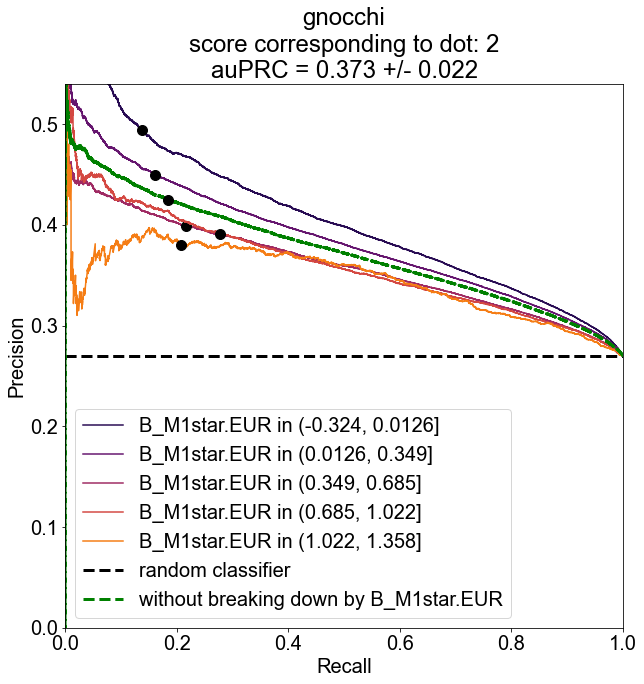

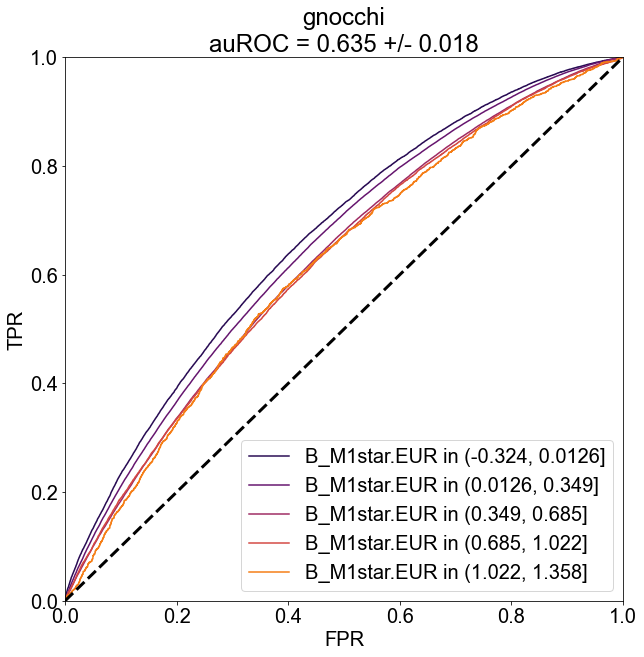

conditioning on GC_content_1000bp in [0.38558346066943017, 0.42231631769777855]
conditioning on B in [0.7824028390130828, 0.8536915045402709]
(-0.469, -0.158]: 1311
(-0.158, 0.151]: 12898
(-0.158, 0.151]: r = 0.27763994417739185; precision = 0.3970189701897019; precision/r = 1.429977849066399; FDR = 0.6029810298102981; FDR/(1-r) = 0.8347375037558468
(0.151, 0.459]: 20578
(0.151, 0.459]: r = 0.2776265915054913; precision = 0.37485843714609285; precision/r = 1.3502252616125152; FDR = 0.6251415628539072; FDR/(1-r) = 0.8653994672322706
(0.459, 0.768]: 10213
(0.459, 0.768]: r = 0.27758738862234406; precision = 0.36670071501532175; precision/r = 1.3210280079193937; FDR = 0.6332992849846782; FDR/(1-r) = 0.8766448356666466
(0.768, 1.077]: 1565
(1.077, 1.386]: 228
(1.386, 1.695]: 6


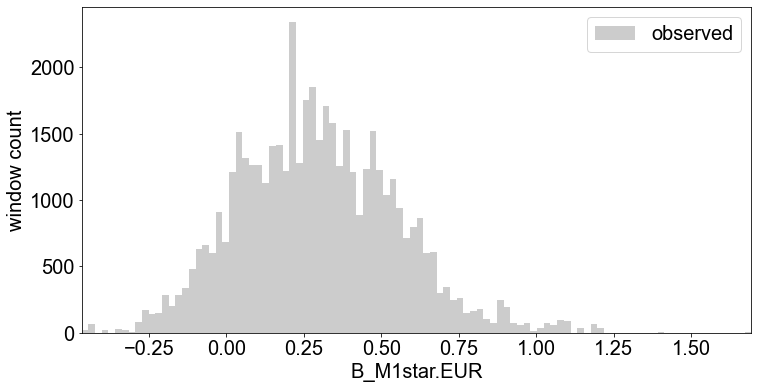

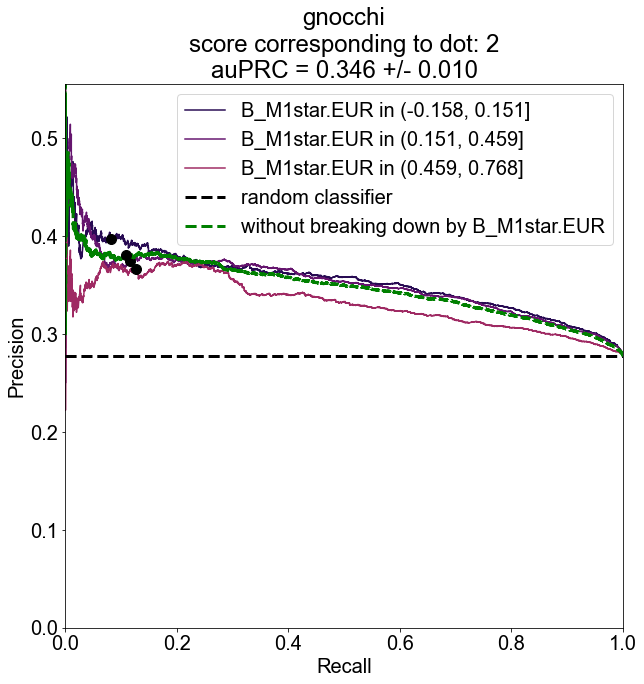

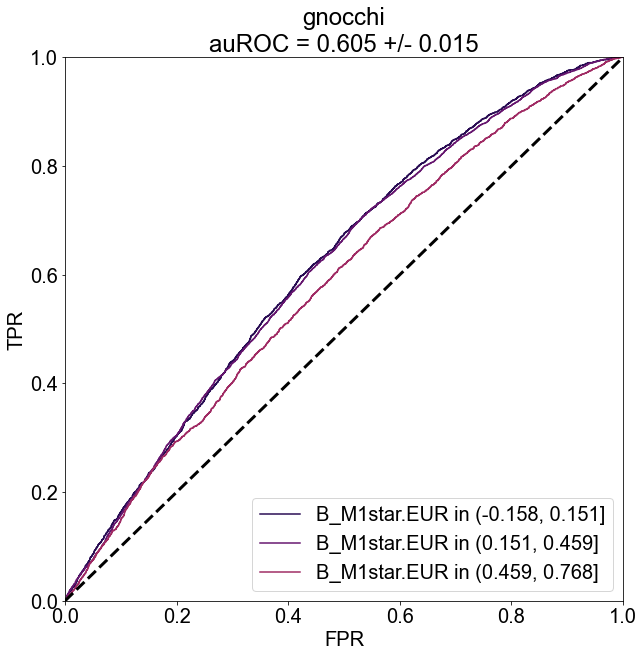

(-0.734, -0.385]: 102358
(-0.734, -0.385]: r = 0.15194708767267825; precision = 0.27236458493171706; precision/r = 1.792496250526631; FDR = 0.7276354150682829; FDR/(1-r) = 0.8580070942406464
(-0.385, -0.0383]: 3086091
(-0.385, -0.0383]: r = 0.15195533767474775; precision = 0.26002202455139917; precision/r = 1.7111740102737447; FDR = 0.7399779754486009; FDR/(1-r) = 0.8725695807337039
(-0.0383, 0.308]: 15630981
(-0.0383, 0.308]: r = 0.1519553379279266; precision = 0.23131868705652894; precision/r = 1.5222807583518054; FDR = 0.7686813129434711; FDR/(1-r) = 0.9064160737304925
(0.308, 0.655]: 13848622
(0.308, 0.655]: r = 0.15195533533950165; precision = 0.20957179705239723; precision/r = 1.3791670860662295; FDR = 0.7904282029476027; FDR/(1-r) = 0.9320596377598089
(0.655, 1.001]: 2860554
(0.655, 1.001]: r = 0.15195518070975064; precision = 0.1949060613514745; precision/r = 1.282654927861685; FDR = 0.8050939386485255; FDR/(1-r) = 0.9493530534415969
(1.001, 1.348]: 321440
(1.001, 1.348]: r = 0

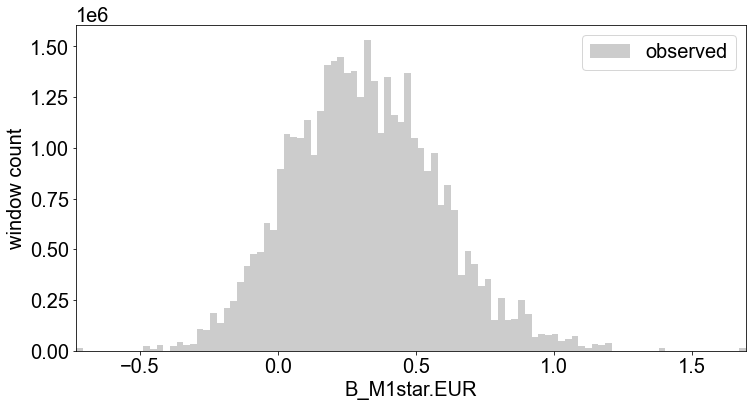

/uufs/chpc.utah.edu/common/HIPAA/u6018199/.conda/envs/constraint-tools/lib/python3.9/site-packages/IPython/core/pylabtools.py:134: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


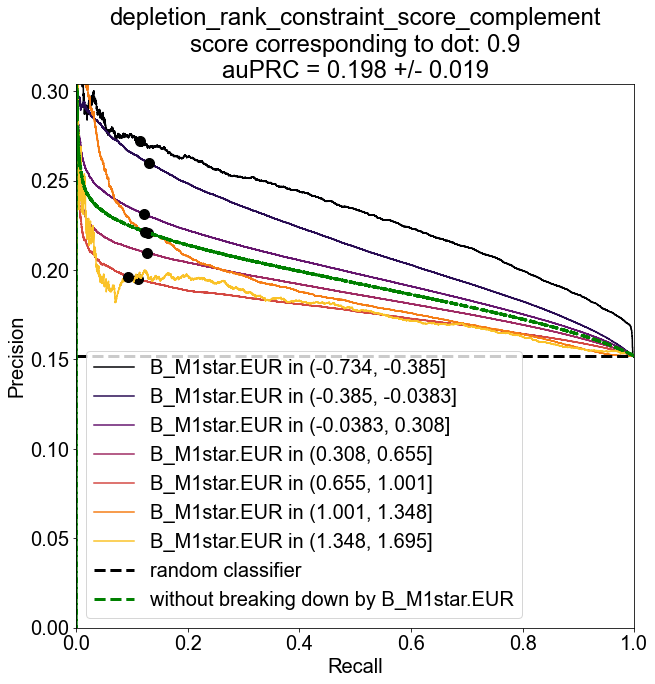

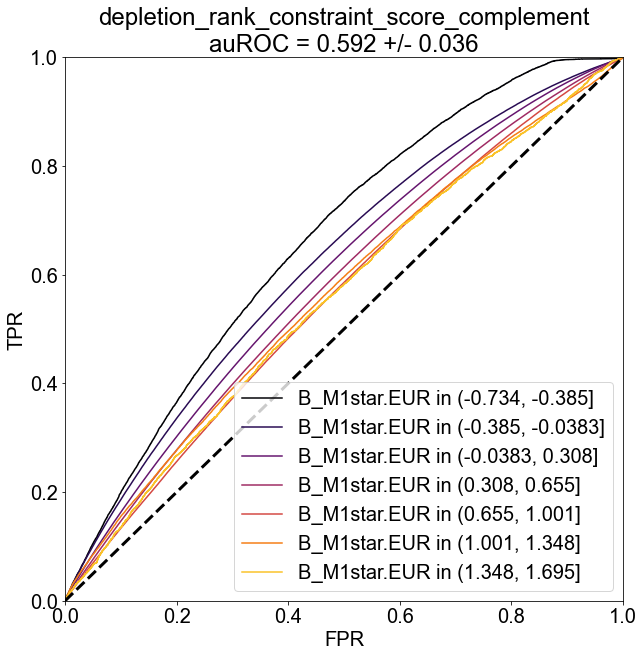

conditioning on GC_content_1000bp in [0.3802793985505721, 0.42073419235976744]
conditioning on B in [0.7765943180648358, 0.8500509136402088]
(-0.663, -0.324]: 6759
(-0.663, -0.324]: r = 0.18863737239236572; precision = 0.26303317535545023; precision/r = 1.3943852801784222; FDR = 0.7369668246445498; FDR/(1-r) = 0.9083075798272269
(-0.324, 0.0126]: 232705
(-0.324, 0.0126]: r = 0.18869813712640468; precision = 0.2771461930805629; precision/r = 1.4687277643600096; FDR = 0.7228538069194371; FDR/(1-r) = 0.8909800901468671
(0.0126, 0.349]: 885099
(0.0126, 0.349]: r = 0.18869753552992377; precision = 0.26369877678023435; precision/r = 1.3974680487462796; FDR = 0.7363012232197657; FDR/(1-r) = 0.9075545255500984
(0.349, 0.685]: 602964
(0.349, 0.685]: r = 0.18869783270643023; precision = 0.25035458539454114; precision/r = 1.3267486001497135; FDR = 0.7496454146054589; FDR/(1-r) = 0.9240027265133628
(0.685, 1.022]: 94098
(0.685, 1.022]: r = 0.18869689047588684; precision = 0.23198529411764707; prec

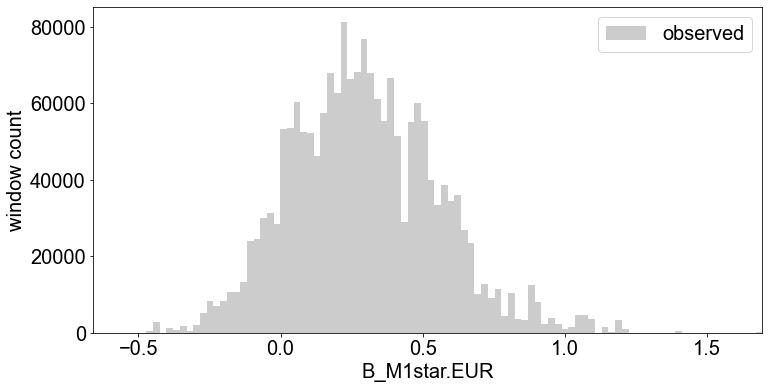

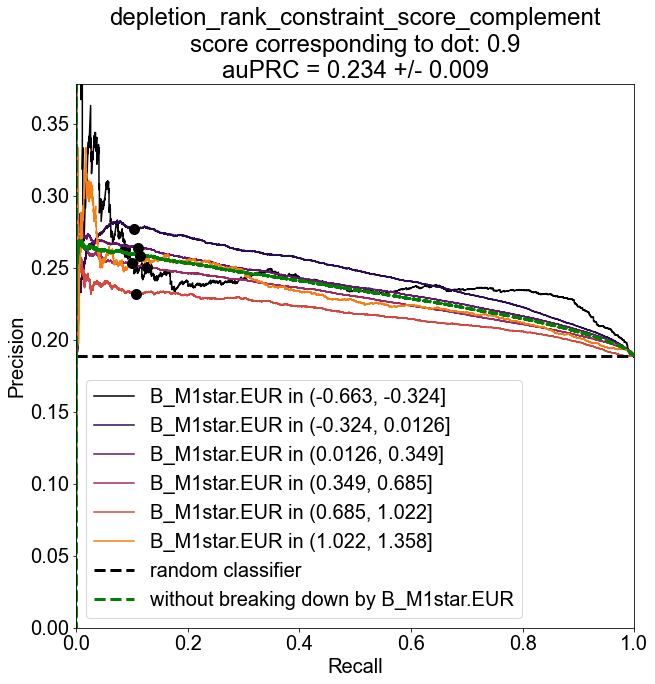

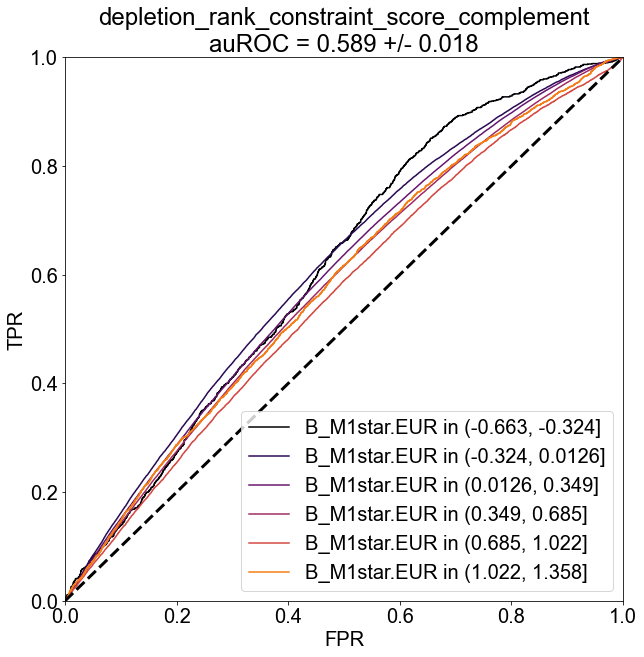

(-0.663, -0.324]: 217
(-0.324, 0.0126]: 6993
(-0.324, 0.0126]: r = 0.27427427427427425; precision = 0.30092923516797715; precision/r = 1.097183598294924; FDR = 0.6990707648320229; FDR/(1-r) = 0.9632713021616427
(0.0126, 0.349]: 26788
(0.0126, 0.349]: r = 0.2742645960878005; precision = 0.2905900501349788; precision/r = 1.0595244675399227; FDR = 0.7094099498650213; FDR/(1-r) = 0.9775049502075094
(0.349, 0.685]: 19617
(0.349, 0.685]: r = 0.27425192435132795; precision = 0.28609769189479334; precision/r = 1.0431930152230782; FDR = 0.7139023081052067; FDR/(1-r) = 0.9836778519421114
(0.685, 1.022]: 3753
(1.022, 1.358]: 423
(1.358, 1.695]: 44


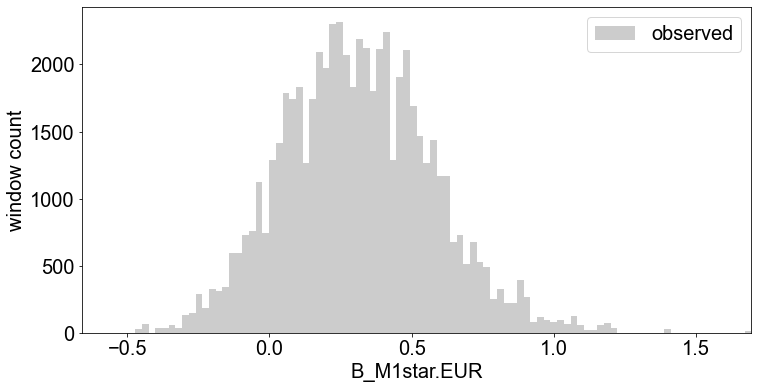

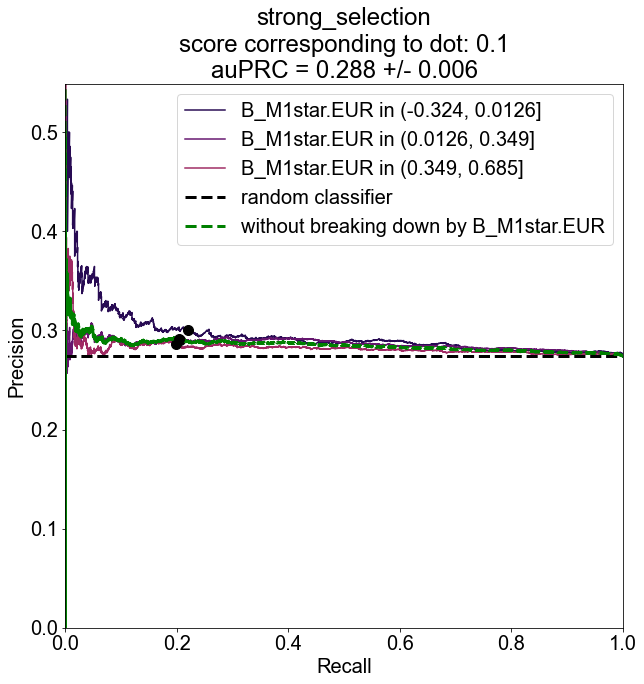

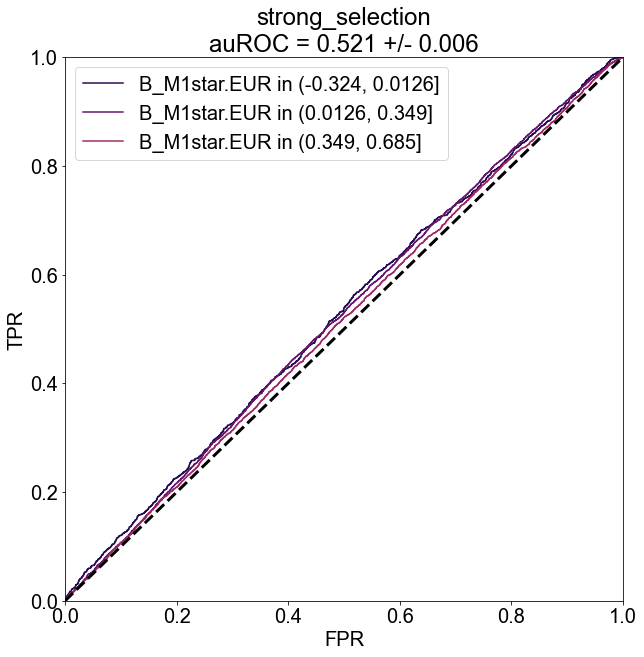

/uufs/chpc.utah.edu/common/HIPAA/u6018199/.conda/envs/constraint-tools/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/uufs/chpc.utah.edu/common/HIPAA/u6018199/.conda/envs/constraint-tools/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/uufs/chpc.utah.edu/common/HIPAA/u6018199/.conda/envs/constraint-tools/lib/python3.9/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/uufs/chpc.utah.edu/common/HIPAA/u6018199/.conda/envs/constraint-tools/lib/python3.9/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/uufs/chpc.utah.edu/common/HIPAA/u6018199/.conda/envs/constraint-tools/lib/python3.9/sit

conditioning on GC_content_1000bp in [0.3845925698686351, 0.42127553136450235]
conditioning on B in [0.7832606434446999, 0.8537524162259117]
(-0.469, -0.2]: 45
(-0.2, 0.0662]: 504
(0.0662, 0.333]: 991
(0.333, 0.599]: 801
(0.599, 0.866]: 223
(0.866, 1.132]: 63
(1.132, 1.399]: 13


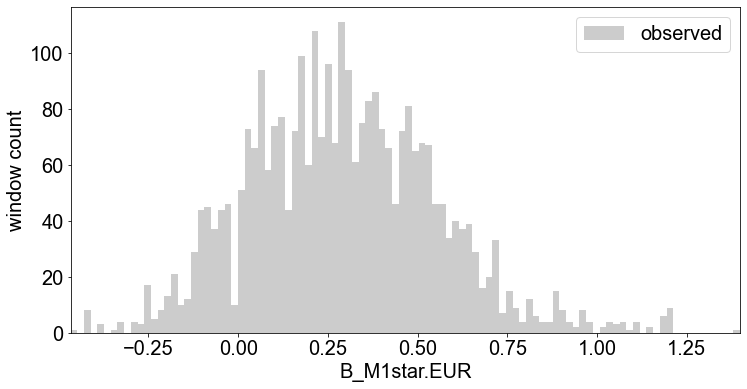

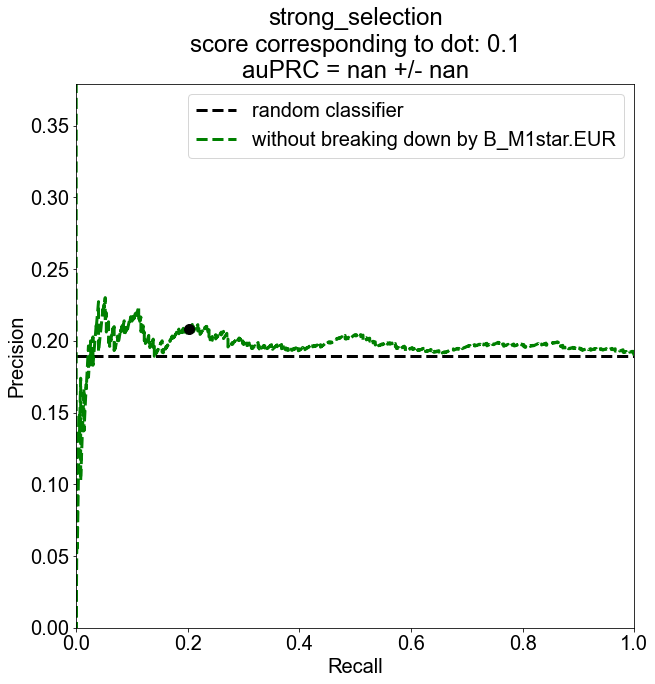

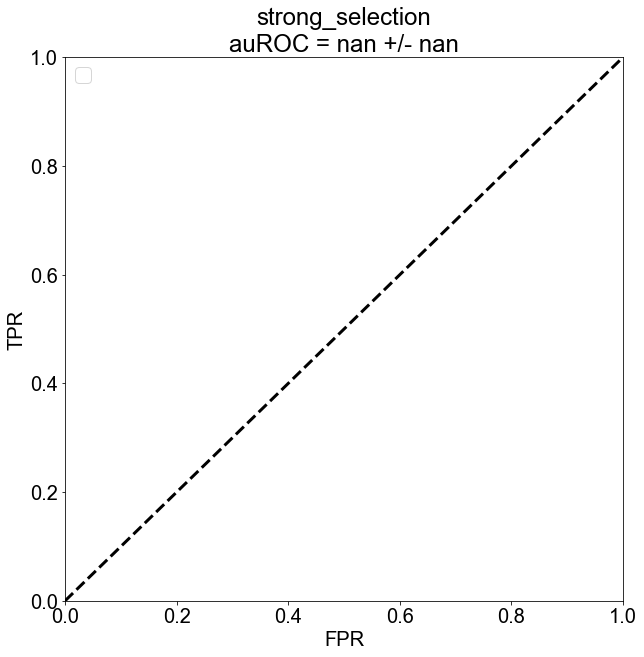

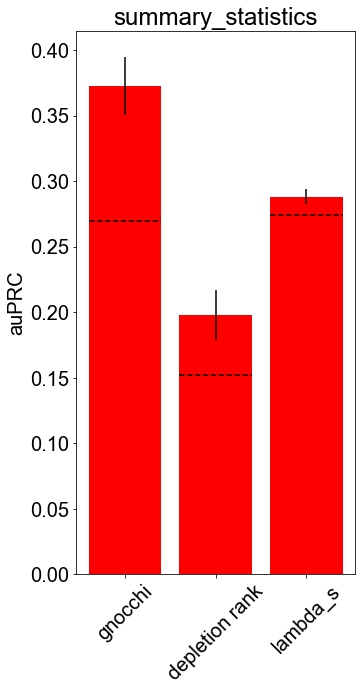

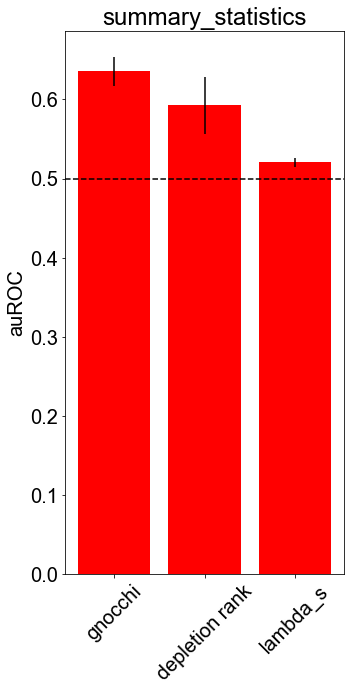

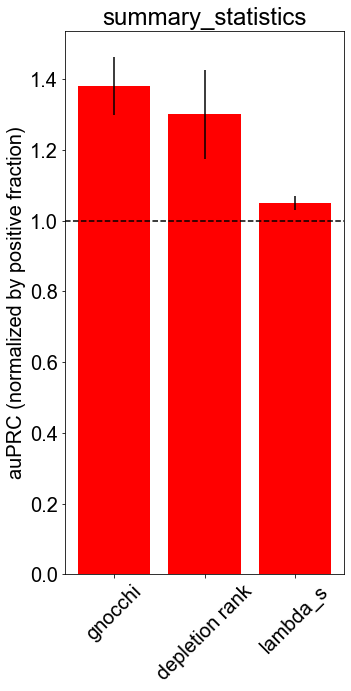

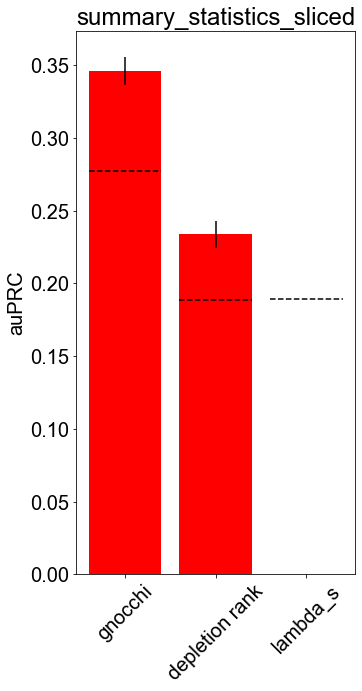

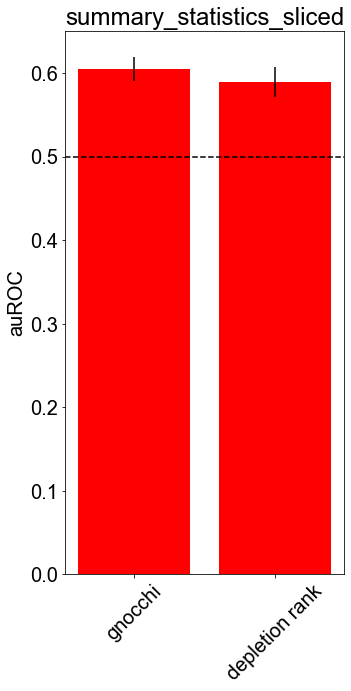

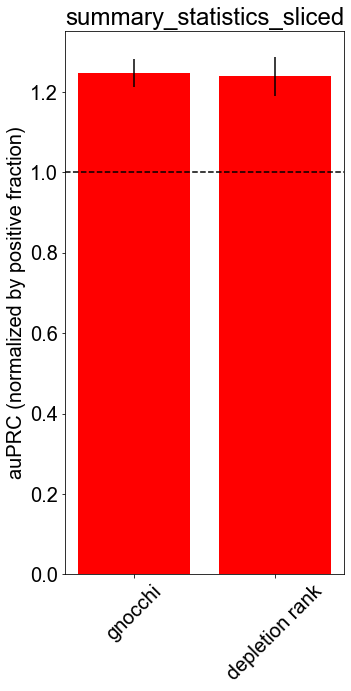

[{'summary_statistics': {'auPRC_(-0.324, 0.0126]': 0.40943864980219574,
   'auPRCnorm_(-0.324, 0.0126]': 1.5177521489670973,
   'auROC_(-0.324, 0.0126]': 0.6650334341924422,
   'auPRC_(0.0126, 0.349]': 0.3854699411665042,
   'auPRCnorm_(0.0126, 0.349]': 1.4289102340541253,
   'auROC_(0.0126, 0.349]': 0.6486944840346199,
   'auPRC_(0.349, 0.685]': 0.3601511031581629,
   'auPRCnorm_(0.349, 0.685]': 1.3350539117070799,
   'auROC_(0.349, 0.685]': 0.6249843050378209,
   'auPRC_(0.685, 1.022]': 0.36128316812367284,
   'auPRCnorm_(0.685, 1.022]': 1.3392796830120486,
   'auROC_(0.685, 1.022]': 0.6219130228779336,
   'auPRC_(1.022, 1.358]': 0.3476026144542513,
   'auPRCnorm_(1.022, 1.358]': 1.2887320459953604,
   'auROC_(1.022, 1.358]': 0.6165062459005832,
   'auPRC': 0.3739022861904616,
   'r': 0.26976399284584224,
   'mean_auPRC': 0.37278909534095733,
   'std_auPRC': 0.022047483847626694,
   'mean_auPRCnorm': 1.3819456047471423,
   'std_auPRCnorm': 0.08167872813376736,
   'mean_auROC': 0.6354

In [15]:
plot_area_under_curve_wrapper(
    gc_window_size=1000,
    feature='B_M1star.EUR',
    number_bins=7,
)